In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(10,10)})

#### READING ALL DATASETS

In [2]:
circuits = pd.read_csv('./data/circuits.csv')
constructor_results = pd.read_csv('./data/constructor_results.csv')
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
constructors = pd.read_csv('./data/constructors.csv')
driver_standings = pd.read_csv('./data/driver_standings.csv')
drivers = pd.read_csv('./data/drivers.csv')
lap_times = pd.read_csv('./data/lap_times.csv')
pit_stops = pd.read_csv('./data/pit_stops.csv')
qualifying = pd.read_csv('./data/qualifying.csv')
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
sprint_results = pd.read_csv('./data/sprint_results.csv')
status = pd.read_csv('./data/status.csv')
weather = pd.read_csv('./data/weather.csv')

#### DROPPING REDUNDANT COLUMNS

In [3]:
del circuits["lat"]
del circuits["lng"]
# del circuits["country"]
del circuits["alt"]
del circuits["url"]
del circuits["name"]
del constructor_results['status']
del constructor_standings["positionText"]
del constructors["name"]
del constructors["url"]
driver_standings.drop(['positionText'], axis=1, inplace=True)
drivers.drop(['surname', 'url'], axis=1, inplace=True)
lap_times.drop(['time'], axis=1, inplace=True)
pit_stops.drop(['time', 'duration'], axis=1, inplace=True)
races = races.drop(['url','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis = 1)
results.drop(['time', 'rank', 'positionText', 'position'], axis = 1, inplace = True)
seasons.drop(['url'], axis = 1, inplace=True)
weather.drop(['weather'], axis = 1, inplace=True)



#### RENAMING

In [4]:
weather.rename(columns={'season': 'year'}, inplace = True)

In [5]:
results.rename(columns={'number': 'car_number', 'points': 'results_points', 'positionOrder': 'results_positionOrder'}, inplace = True)

In [6]:
qualifying.rename(columns={'q1': 'q1_time', 'q2':'q2_time', 'q3': 'q3_time', 'position': 'qualifying_position'}, inplace=True)

In [7]:
circuits.rename(columns={'location': 'circuit_location'}, inplace = True)

In [8]:
constructor_standings.rename(columns = {'position': 'constructor_position', 'points': 'constructor_points', 'wins': 'constructor_wins'}, inplace = True)

In [9]:
constructors.rename(columns={'nationality': 'constructor_nationality'}, inplace = True)

In [10]:
drivers.rename(columns={'number': 'driver_number', 'nationality': 'driver_nationality', 'code': 'driver_code'}, inplace = True)

In [11]:
driver_standings.rename(columns={'position': 'driver_position', 'points': 'driver_points', 'wins': 'driver_wins'}, inplace = True)

In [12]:
lap_times.rename(columns = {'position': 'lap_position'}, inplace=True)

#### MERGING DATA

##### df1: races + weather

In [13]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1079 non-null   int64 
 1   year       1079 non-null   int64 
 2   round      1079 non-null   int64 
 3   circuitId  1079 non-null   int64 
 4   name       1079 non-null   object
 5   date       1079 non-null   object
 6   time       1079 non-null   object
dtypes: int64(4), object(3)
memory usage: 59.1+ KB


In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            1018 non-null   int64 
 1   round           1018 non-null   int64 
 2   circuit_id      1018 non-null   object
 3   weather_warm    1018 non-null   int64 
 4   weather_cold    1018 non-null   int64 
 5   weather_dry     1018 non-null   int64 
 6   weather_wet     1018 non-null   int64 
 7   weather_cloudy  1018 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.8+ KB


In [15]:
df_1 = pd.merge(races, weather, on = ['year', 'round'], how = 'outer')
df_1.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,0.0,0.0,0.0
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,1.0,1.0,0.0
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,shanghai,0.0,0.0,0.0,1.0,0.0
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,bahrain,1.0,0.0,0.0,0.0,0.0
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,catalunya,1.0,0.0,0.0,0.0,0.0


In [16]:
df_1.shape

(1079, 13)

In [17]:
results.head()

,resultId,raceId,driverId,constructorId,car_number,grid,results_positionOrder,results_points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,10.0,58,5690616,39,1:27.452,218.300,1
1,2,18,2,2,3,5,2,8.0,58,5696094,41,1:27.739,217.586,1
2,3,18,3,3,7,7,3,6.0,58,5698779,41,1:28.090,216.719,1
3,4,18,4,4,5,11,4,5.0,58,5707797,58,1:28.603,215.464,1
4,5,18,5,1,23,3,5,4.0,58,5708630,43,1:27.418,218.385,1


##### df2: df1 + results

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   raceId          1079 non-null   int64  
 1   year            1079 non-null   int64  
 2   round           1079 non-null   int64  
 3   circuitId       1079 non-null   int64  
 4   name            1079 non-null   object 
 5   date            1079 non-null   object 
 6   time            1079 non-null   object 
 7   circuit_id      1018 non-null   object 
 8   weather_warm    1018 non-null   float64
 9   weather_cold    1018 non-null   float64
 10  weather_dry     1018 non-null   float64
 11  weather_wet     1018 non-null   float64
 12  weather_cloudy  1018 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 118.0+ KB


In [19]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               25660 non-null  int64  
 1   raceId                 25660 non-null  int64  
 2   driverId               25660 non-null  int64  
 3   constructorId          25660 non-null  int64  
 4   car_number             25660 non-null  object 
 5   grid                   25660 non-null  int64  
 6   results_positionOrder  25660 non-null  int64  
 7   results_points         25660 non-null  float64
 8   laps                   25660 non-null  int64  
 9   milliseconds           25660 non-null  object 
 10  fastestLap             25660 non-null  object 
 11  fastestLapTime         25660 non-null  object 
 12  fastestLapSpeed        25660 non-null  object 
 13  statusId               25660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.7+ 

In [20]:
df_2 = pd.merge(df_1, results, on = 'raceId')
df_2.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,car_number,grid,results_positionOrder,results_points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,22,1,1,10.0,58,5655784,17,1:28.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,23,2,2,8.0,58,5656591,43,1:29.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,9,20,3,6.0,58,5657388,50,1:28.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,10,19,4,5.0,58,5660219,53,1:28.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,7,10,5,4.0,58,5660663,53,1:28.712,215.199,1


In [21]:
df_2.shape

(25660, 26)

##### df3: df2 + status

In [22]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [23]:
df_3 = pd.merge(df_2, status, on = 'statusId')
df_3.loc[df_3['circuitId'] == 2]

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,grid,results_positionOrder,results_points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId,status
11,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,...,1,1,5.0,31,4252092,18,1:36.641,206.483,1,Finished
12,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,...,10,2,4.0,31,4274814,17,1:39.084,201.392,1,Finished
13,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,...,3,3,3.0,31,4275605,18,1:39.406,200.740,1,Finished
14,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,...,2,4,2.5,31,4298265,12,1:37.591,204.473,1,Finished
15,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,0.0,0.0,...,8,5,2.0,31,4299452,17,1:37.484,204.698,1,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25406,927,2015,2,2,Malaysian Grand Prix,2015-03-29,07:00:00,sepang,0.0,0.0,...,17,17,0.0,41,\N,38,1:46.056,188.153,101,Turbo
25563,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,sepang,0.0,0.0,...,24,23,0.0,14,\N,5,1:49.385,182.427,128,+42 Laps
25564,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,sepang,0.0,0.0,...,18,24,0.0,8,\N,5,1:45.689,188.806,129,Engine misfire
25608,927,2015,2,2,Malaysian Grand Prix,2015-03-29,07:00:00,sepang,0.0,0.0,...,18,18,0.0,21,\N,17,1:48.460,183.983,132,ERS


In [24]:
df_3.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,grid,results_positionOrder,results_points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId,status
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,1,10.0,58,5655784,17,1:28.020,216.891,1,Finished
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,2,2,8.0,58,5656591,43,1:29.066,214.344,1,Finished
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,20,3,6.0,58,5657388,50,1:28.916,214.706,1,Finished
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,19,4,5.0,58,5660219,53,1:28.416,215.920,1,Finished
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,10,5,4.0,58,5660663,53,1:28.712,215.199,1,Finished


In [25]:
df_3.shape

(25660, 27)

#####

##### df4: df3 + circuits

In [26]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   circuitId         76 non-null     int64 
 1   circuitRef        76 non-null     object
 2   circuit_location  76 non-null     object
 3   country           76 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 25660 non-null  int64  
 1   year                   25660 non-null  int64  
 2   round                  25660 non-null  int64  
 3   circuitId              25660 non-null  int64  
 4   name                   25660 non-null  object 
 5   date                   25660 non-null  object 
 6   time                   25660 non-null  object 
 7   circuit_id             24620 non-null  object 
 8   weather_warm           24620 non-null  float64
 9   weather_cold           24620 non-null  float64
 10  weather_dry            24620 non-null  float64
 11  weather_wet            24620 non-null  float64
 12  weather_cloudy         24620 non-null  float64
 13  resultId               25660 non-null  int64  
 14  driverId               25660 non-null  int64  
 15  co

In [28]:
df_4 = pd.merge(df_3, circuits, on = 'circuitId')
df_4.drop(['circuitRef'], axis = 1, inplace=True)

df_4.shape

(25660, 29)

In [29]:
df_4.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,results_points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId,status,circuit_location,country
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,10.0,58,5655784,17,1:28.020,216.891,1,Finished,Melbourne,Australia
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,8.0,58,5656591,43,1:29.066,214.344,1,Finished,Melbourne,Australia
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,6.0,58,5657388,50,1:28.916,214.706,1,Finished,Melbourne,Australia
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,5.0,58,5660219,53,1:28.416,215.920,1,Finished,Melbourne,Australia
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,4.0,58,5660663,53,1:28.712,215.199,1,Finished,Melbourne,Australia


##### df5: df4 + constructor_standings

In [30]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 25660 non-null  int64  
 1   year                   25660 non-null  int64  
 2   round                  25660 non-null  int64  
 3   circuitId              25660 non-null  int64  
 4   name                   25660 non-null  object 
 5   date                   25660 non-null  object 
 6   time                   25660 non-null  object 
 7   circuit_id             24620 non-null  object 
 8   weather_warm           24620 non-null  float64
 9   weather_cold           24620 non-null  float64
 10  weather_dry            24620 non-null  float64
 11  weather_wet            24620 non-null  float64
 12  weather_cloudy         24620 non-null  float64
 13  resultId               25660 non-null  int64  
 14  driverId               25660 non-null  int64  
 15  co

In [31]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12841 non-null  int64  
 1   raceId                  12841 non-null  int64  
 2   constructorId           12841 non-null  int64  
 3   constructor_points      12841 non-null  float64
 4   constructor_position    12841 non-null  int64  
 5   constructor_wins        12841 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 602.0 KB


In [32]:
df_5=pd.merge(df_4,constructor_standings, on = ['raceId', 'constructorId'],how='left')
df_5 .head()                                                                                   

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,fastestLapTime,fastestLapSpeed,statusId,status,circuit_location,country,constructorStandingsId,constructor_points,constructor_position,constructor_wins
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1:28.020,216.891,1,Finished,Melbourne,Australia,4038.0,18.0,1.0,1.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1:29.066,214.344,1,Finished,Melbourne,Australia,4038.0,18.0,1.0,1.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1:28.916,214.706,1,Finished,Melbourne,Australia,4039.0,11.0,2.0,0.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1:28.416,215.920,1,Finished,Melbourne,Australia,4039.0,11.0,2.0,0.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1:28.712,215.199,1,Finished,Melbourne,Australia,4040.0,4.0,3.0,0.0


In [33]:
df_5.shape

(25660, 33)

##### df6: df5 + constructors

In [34]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   constructorId            211 non-null    int64 
 1   constructorRef           211 non-null    object
 2   constructor_nationality  211 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


In [35]:
constructors.head()

,constructorId,constructorRef,constructor_nationality
0,1,mclaren,British
1,2,bmw_sauber,German
2,3,williams,British
3,4,renault,French
4,5,toro_rosso,Italian


In [36]:
df_6=pd.merge(df_5,constructors,on=['constructorId'],how='left')
df_6.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,statusId,status,circuit_location,country,constructorStandingsId,constructor_points,constructor_position,constructor_wins,constructorRef,constructor_nationality
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,Finished,Melbourne,Australia,4038.0,18.0,1.0,1.0,brawn,British
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,Finished,Melbourne,Australia,4038.0,18.0,1.0,1.0,brawn,British
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,Finished,Melbourne,Australia,4039.0,11.0,2.0,0.0,toyota,Japanese
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,Finished,Melbourne,Australia,4039.0,11.0,2.0,0.0,toyota,Japanese
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1,Finished,Melbourne,Australia,4040.0,4.0,3.0,0.0,renault,French


In [37]:
df_6.shape

(25660, 35)

##### df7: df6 + drivers

In [38]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driverId            854 non-null    int64 
 1   driverRef           854 non-null    object
 2   driver_number       854 non-null    object
 3   driver_code         854 non-null    object
 4   forename            854 non-null    object
 5   dob                 854 non-null    object
 6   driver_nationality  854 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.8+ KB


In [39]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

In [40]:
df_7=pd.merge(df_6,drivers,on=['driverId'])
df_7.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,constructor_position,constructor_wins,constructorRef,constructor_nationality,driverRef,driver_number,driver_code,forename,dob,driver_nationality
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1.0,1.0,brawn,British,button,22,BUT,Jenson,1980-01-19,British
1,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,albert_park,0.0,0.0,...,4.0,0.0,bar,British,button,22,BUT,Jenson,1980-01-19,British
2,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,albert_park,1.0,0.0,...,6.0,0.0,bar,British,button,22,BUT,Jenson,1980-01-19,British
3,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,albert_park,0.0,0.0,...,2.0,1.0,mclaren,British,button,22,BUT,Jenson,1980-01-19,British
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,0.0,0.0,...,2.0,0.0,mclaren,British,button,22,BUT,Jenson,1980-01-19,British


In [41]:
df_7.shape

(25660, 41)

##### df8: df7 + driver_standings

In [42]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

In [43]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33686 non-null  int64  
 1   raceId             33686 non-null  int64  
 2   driverId           33686 non-null  int64  
 3   driver_points      33686 non-null  float64
 4   driver_position    33686 non-null  int64  
 5   driver_wins        33686 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.5 MB


In [44]:
df_8 = pd.merge(df_7, driver_standings, on = ['raceId', 'driverId'], how = 'left')
df_8.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,driverRef,driver_number,driver_code,forename,dob,driver_nationality,driverStandingsId,driver_points,driver_position,driver_wins
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,button,22,BUT,Jenson,1980-01-19,British,8247.0,10.0,1.0,1.0
1,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,albert_park,0.0,0.0,...,button,22,BUT,Jenson,1980-01-19,British,12427.0,3.0,6.0,0.0
2,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,albert_park,1.0,0.0,...,button,22,BUT,Jenson,1980-01-19,British,12117.0,0.0,10.0,0.0
3,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,albert_park,0.0,0.0,...,button,22,BUT,Jenson,1980-01-19,British,63767.0,31.0,3.0,1.0
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,0.0,0.0,...,button,22,BUT,Jenson,1980-01-19,British,64695.0,8.0,6.0,0.0


In [45]:
df_8.shape

(25660, 45)

In [46]:
df_8.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'circuit_id', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'resultId', 'driverId',
       'constructorId', 'car_number', 'grid', 'results_positionOrder',
       'results_points', 'laps', 'milliseconds', 'fastestLap',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'status',
       'circuit_location', 'country', 'constructorStandingsId',
       'constructor_points', 'constructor_position', 'constructor_wins',
       'constructorRef', 'constructor_nationality', 'driverRef',
       'driver_number', 'driver_code', 'forename', 'dob', 'driver_nationality',
       'driverStandingsId', 'driver_points', 'driver_position', 'driver_wins'],
      dtype='object')

##### df9: df8 + qualifying

In [47]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

In [48]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   qualifyId            9395 non-null   int64 
 1   raceId               9395 non-null   int64 
 2   driverId             9395 non-null   int64 
 3   constructorId        9395 non-null   int64 
 4   number               9395 non-null   int64 
 5   qualifying_position  9395 non-null   int64 
 6   q1_time              9387 non-null   object
 7   q2_time              9244 non-null   object
 8   q3_time              9101 non-null   object
dtypes: int64(6), object(3)
memory usage: 660.7+ KB


In [49]:
df_9 = pd.merge(df_8, qualifying, on = ['raceId', 'driverId', 'constructorId'], how = 'left')
df_9.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,driverStandingsId,driver_points,driver_position,driver_wins,qualifyId,number,qualifying_position,q1_time,q2_time,q3_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,8247.0,10.0,1.0,1.0,2986.0,22.0,1.0,1:25.211,1:24.855,1:26.202
1,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,albert_park,0.0,0.0,...,12427.0,3.0,6.0,0.0,4084.0,9.0,4.0,1:24.998,\N,\N
2,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,albert_park,1.0,0.0,...,12117.0,0.0,10.0,0.0,3789.0,17.0,8.0,1:28.682,\N,\N
3,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,albert_park,0.0,0.0,...,63767.0,31.0,3.0,1.0,3353.0,1.0,4.0,1:24.897,1:24.531,1:24.675
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,0.0,0.0,...,64695.0,8.0,6.0,0.0,4540.0,4.0,4.0,1:25.886,1:24.957,1:24.779


In [50]:
df_9.shape

(25660, 51)

##### df10: df9 + pit_stops 

In [51]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

In [52]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9299 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   raceId        9299 non-null   int64
 1   driverId      9299 non-null   int64
 2   stop          9299 non-null   int64
 3   lap           9299 non-null   int64
 4   milliseconds  9299 non-null   int64
dtypes: int64(5)
memory usage: 363.4 KB


In [53]:
uniqueRaceIds = pit_stops['raceId'].unique()

In [54]:
df_list = []
for i in uniqueRaceIds:
    x = pit_stops.loc[pit_stops['raceId'] == i]
    uniqueDriverIds = x['driverId'].unique()    
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        # print(y)
        no_of_pit_stops = len(y)
        avg_pit_stop_time = y['milliseconds'].mean()
        row.append(i)
        row.append(j)
        row.append(no_of_pit_stops)
        row.append(avg_pit_stop_time)        
        df_list.append(row)
temp_pit_stops = pd.DataFrame(df_list, columns=['raceId', 'driverId', 'no_of_stops', 'ms_avg'])
temp_pit_stops
        

,raceId,driverId,no_of_stops,ms_avg
0,841,153,3,25903.000000
1,841,30,2,24504.500000
2,841,17,3,24058.666667
3,841,4,3,24055.000000
4,841,13,3,24145.666667
...,...,...,...,...
4530,1086,4,1,22083.000000
4531,1086,854,2,22759.500000
4532,1086,839,1,23581.000000
4533,1086,822,1,22272.000000


In [55]:
temp_pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       4535 non-null   int64  
 1   driverId     4535 non-null   int64  
 2   no_of_stops  4535 non-null   int64  
 3   ms_avg       4535 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 141.8 KB


In [56]:
df_10 = pd.merge(df_9, temp_pit_stops, on = ['raceId', 'driverId'], how = 'left')
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

##### df11: df10 + lap_times

In [57]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   25660 non-null  int64  
 1   year                     25660 non-null  int64  
 2   round                    25660 non-null  int64  
 3   circuitId                25660 non-null  int64  
 4   name                     25660 non-null  object 
 5   date                     25660 non-null  object 
 6   time                     25660 non-null  object 
 7   circuit_id               24620 non-null  object 
 8   weather_warm             24620 non-null  float64
 9   weather_cold             24620 non-null  float64
 10  weather_dry              24620 non-null  float64
 11  weather_wet              24620 non-null  float64
 12  weather_cloudy           24620 non-null  float64
 13  resultId                 25660 non-null  int64  
 14  driverId              

In [58]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528785 entries, 0 to 528784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   raceId        528785 non-null  int64
 1   driverId      528785 non-null  int64
 2   lap           528785 non-null  int64
 3   lap_position  528785 non-null  int64
 4   milliseconds  528785 non-null  int64
dtypes: int64(5)
memory usage: 20.2 MB


In [59]:
uniqueRaceIds = lap_times['raceId'].unique()

In [60]:
df_list = []
for i in uniqueRaceIds:
    x = lap_times.loc[lap_times['raceId'] == i]
    uniqueDriverIds = x['driverId'].unique()    
    max_laps = 0
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        max_laps = max(max_laps, len(y))            
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        first_5_laps_avg_time = y[0:5]['milliseconds'].mean()
        last_10_laps_avg_time = y[max_laps-10:max_laps]['milliseconds'].mean()
        lap_position_after_first_5_laps = y.loc[y['lap'] == 5]
        lap_position_after_first_5_laps = lap_position_after_first_5_laps['lap_position']      
        lap_position_before_last_10_laps  = y.loc[y['lap'] == max_laps - 10]
        lap_position_before_last_10_laps = lap_position_before_last_10_laps['lap_position']
        row.append(i)
        row.append(j)
        row.append(first_5_laps_avg_time)
        row.append(last_10_laps_avg_time)
        row.append(str(lap_position_after_first_5_laps).split('\n')[0].split(' ')[4])
        row.append(str(lap_position_before_last_10_laps).split('\n')[0].split(' ')[4])
        df_list.append(row)
        
temp_lap_times = pd.DataFrame(df_list, columns=['raceId', 'driverId', 'first_5_avg_time', 'last_10_avg_time', 'lap_position_after_5', 'lap_position_before_last_10'])
temp_lap_times
        

,raceId,driverId,first_5_avg_time,last_10_avg_time,lap_position_after_5,lap_position_before_last_10
0,841,20,93794.6,90805.200000,1,1
1,841,1,94460.0,91830.200000,2,2
2,841,17,94846.4,90307.200000,3,5
3,841,808,95722.8,90518.000000,4,3
4,841,13,96591.4,91314.500000,5,10
...,...,...,...,...,...,...
9966,1086,852,95577.6,93175.375000,15,20
9967,1086,855,95877.4,87468.222222,17,17
9968,1086,20,95703.0,88367.333333,16,12
9969,1086,849,96259.6,88173.666667,18,19


In [61]:
temp_lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   raceId                       9971 non-null   int64  
 1   driverId                     9971 non-null   int64  
 2   first_5_avg_time             9971 non-null   float64
 3   last_10_avg_time             7896 non-null   float64
 4   lap_position_after_5         9971 non-null   object 
 5   lap_position_before_last_10  9971 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 467.5+ KB


In [62]:
df_11 = pd.merge(df_10, temp_lap_times, on = ['raceId', 'driverId'], how = 'left')
df_11.shape

(25660, 57)

In [63]:
df_11.head()

,raceId,year,round,circuitId,name,date,time,circuit_id,weather_warm,weather_cold,...,qualifying_position,q1_time,q2_time,q3_time,no_of_stops,ms_avg,first_5_avg_time,last_10_avg_time,lap_position_after_5,lap_position_before_last_10
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,1.0,0.0,...,1.0,1:25.211,1:24.855,1:26.202,NaN,NaN,90824.4,105341.9,1,1
1,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,albert_park,0.0,0.0,...,4.0,1:24.998,\N,\N,NaN,NaN,88547.6,86937.7,4,6
2,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,albert_park,1.0,0.0,...,8.0,1:28.682,\N,\N,NaN,NaN,108554.8,89386.8,18,11
3,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,albert_park,0.0,0.0,...,4.0,1:24.897,1:24.531,1:24.675,NaN,NaN,141379.4,90691.1,6,1
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,albert_park,0.0,0.0,...,4.0,1:25.886,1:24.957,1:24.779,3.0,20950.333333,96742.6,90464.8,6,6


In [64]:
df_11.to_csv('./data/dataset.csv')

## EDA

#### Info of all columns

In [65]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   raceId                       25660 non-null  int64  
 1   year                         25660 non-null  int64  
 2   round                        25660 non-null  int64  
 3   circuitId                    25660 non-null  int64  
 4   name                         25660 non-null  object 
 5   date                         25660 non-null  object 
 6   time                         25660 non-null  object 
 7   circuit_id                   24620 non-null  object 
 8   weather_warm                 24620 non-null  float64
 9   weather_cold                 24620 non-null  float64
 10  weather_dry                  24620 non-null  float64
 11  weather_wet                  24620 non-null  float64
 12  weather_cloudy               24620 non-null  float64
 13  resultId        

#### Value counts for each columns

In [66]:
for i in df_11.columns:
    print('----' + str(i) + '----')
    print(df_11[i].value_counts())

----raceId----
800    55
809    47
370    39
367    39
371    39
       ..
662    14
470    14
827    13
660    13
765    10
Name: raceId, Length: 1070, dtype: int64
----year----
1989    620
1990    542
1991    539
1988    495
2012    480
       ... 
1951    179
1969    177
1957    171
1966    166
1950    160
Name: year, Length: 73, dtype: int64
----round----
2     1800
6     1771
7     1769
5     1762
3     1754
8     1701
1     1698
4     1696
9     1585
10    1495
11    1385
12    1315
13    1262
14    1215
15    1140
16    1001
17     511
18     316
19     256
20     126
21      82
22      20
Name: round, dtype: int64
----circuitId----
14    1776
6     1624
9     1396
13    1198
7     1012
      ... 
63      19
62      16
65      16
54      15
61      15
Name: circuitId, Length: 76, dtype: int64
----name----
British Grand Prix               1833
Italian Grand Prix               1804
Monaco Grand Prix                1624
German Grand Prix                1599
Belgian Grand Prix      

#### Checking Null Values 

###### According to us, the columns [raceId, circuitId, DriverId, ConstructorId, Car_number, statusId] should not contain any null values

In [67]:
for i in df_11.columns:
    print(str(i) + ' : ' + str(df_11[i].isna().any()))

raceId : False
year : False
round : False
circuitId : False
name : False
date : False
time : False
circuit_id : True
weather_warm : True
weather_cold : True
weather_dry : True
weather_wet : True
weather_cloudy : True
resultId : False
driverId : False
constructorId : False
car_number : False
grid : False
results_positionOrder : False
results_points : False
laps : False
milliseconds : False
fastestLap : False
fastestLapTime : False
fastestLapSpeed : False
statusId : False
status : False
circuit_location : False
country : False
constructorStandingsId : True
constructor_points : True
constructor_position : True
constructor_wins : True
constructorRef : False
constructor_nationality : False
driverRef : False
driver_number : False
driver_code : False
forename : False
dob : False
driver_nationality : False
driverStandingsId : True
driver_points : True
driver_position : True
driver_wins : True
qualifyId : True
number : True
qualifying_position : True
q1_time : True
q2_time : True
q3_time : True

###### The above specified columns DO NOT have any null values

#### HISTPLOTS

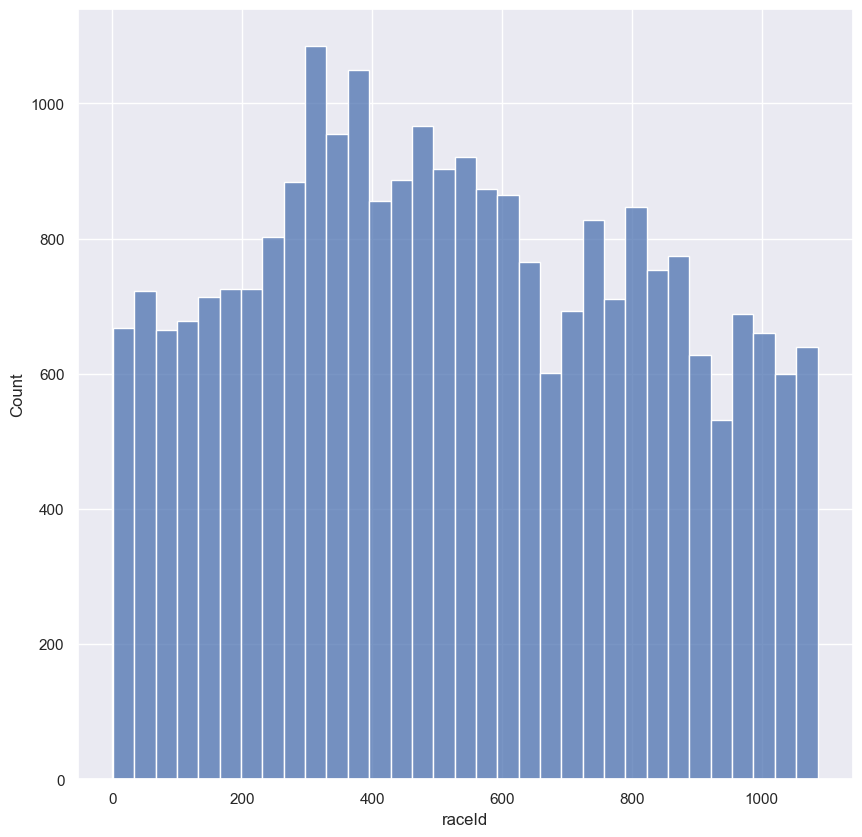

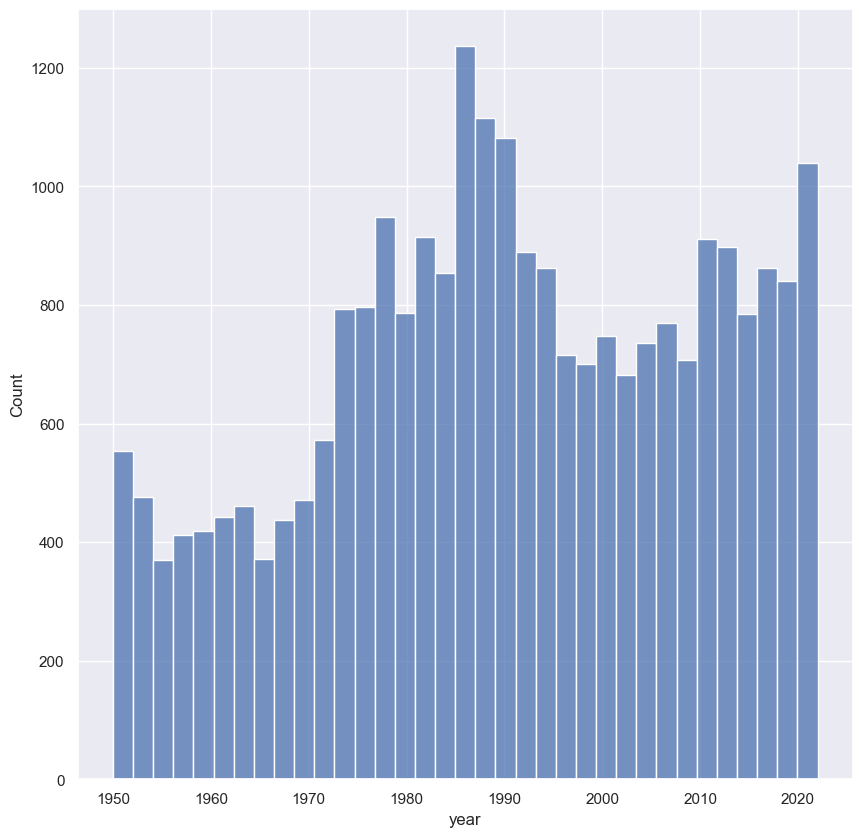

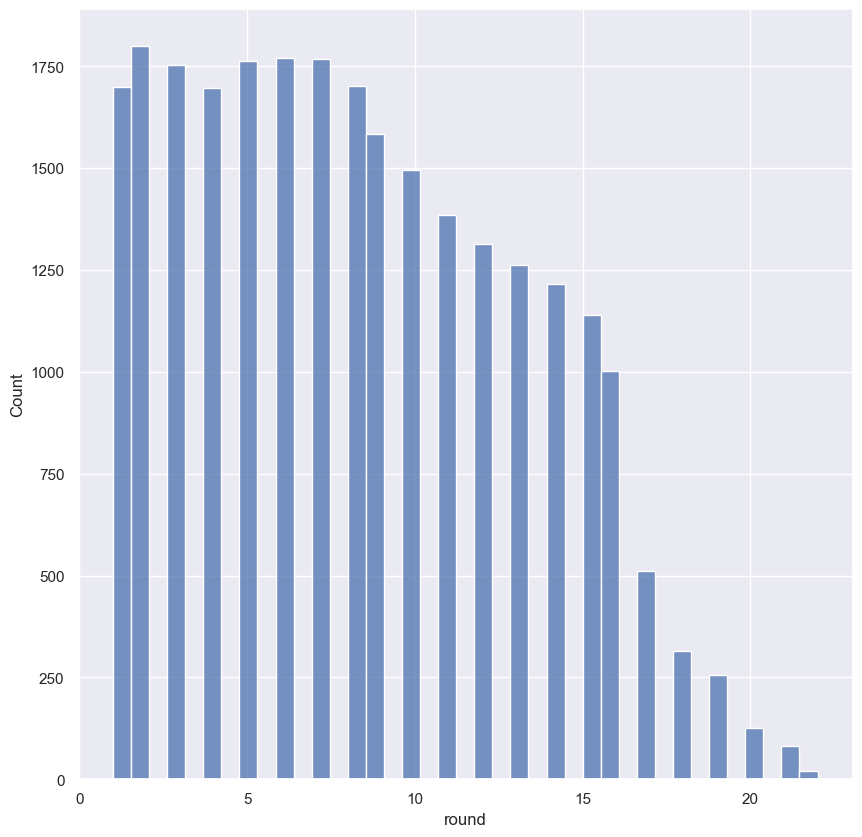

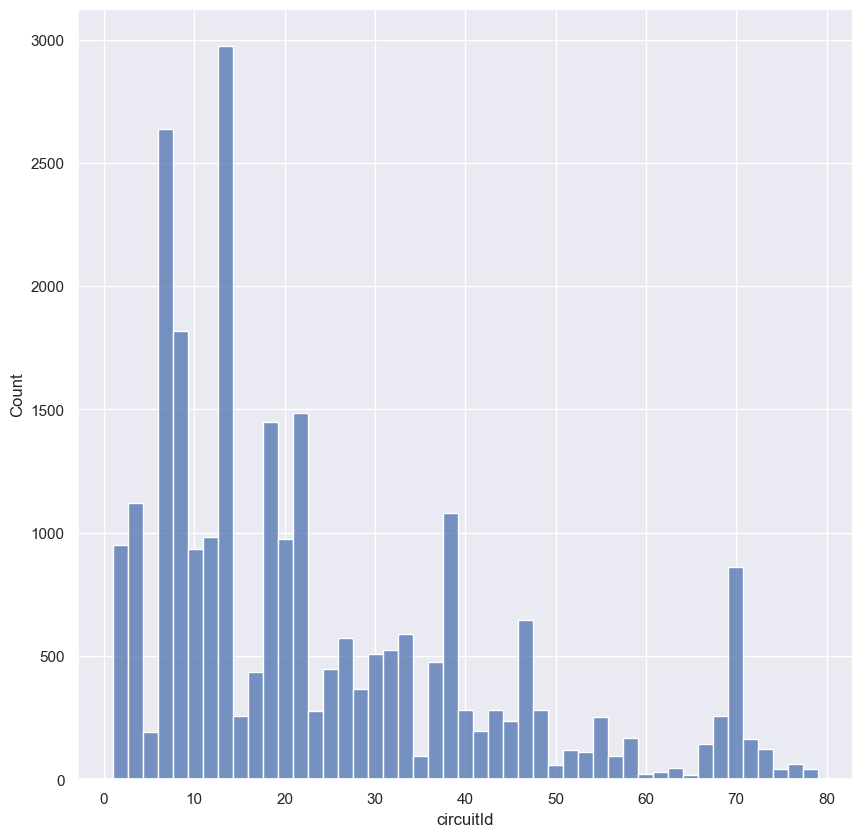

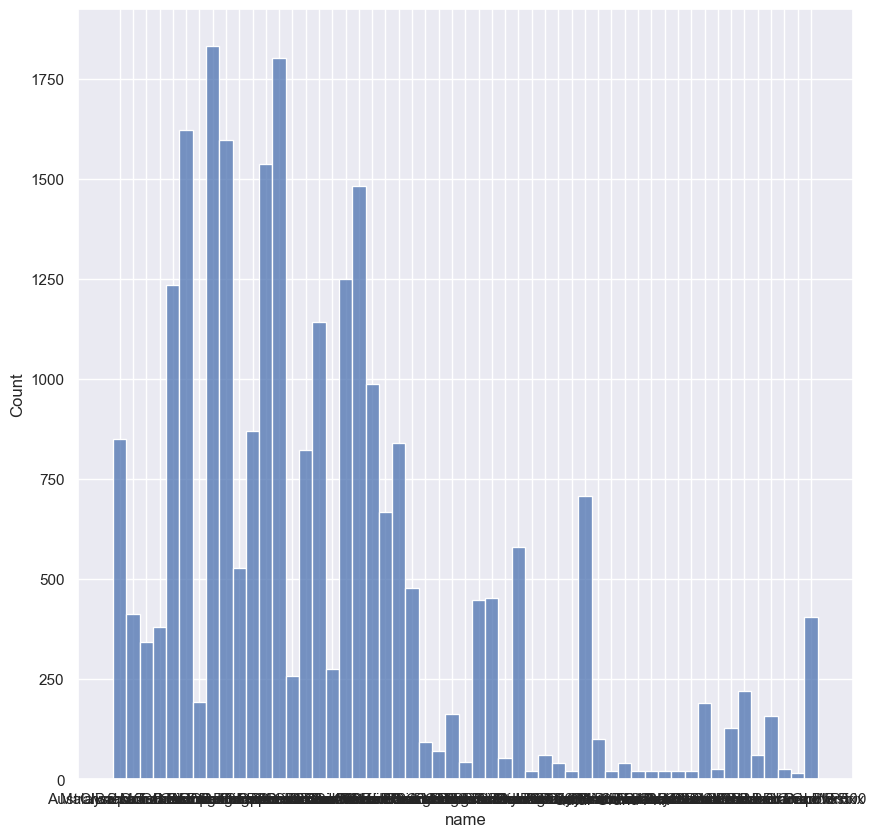

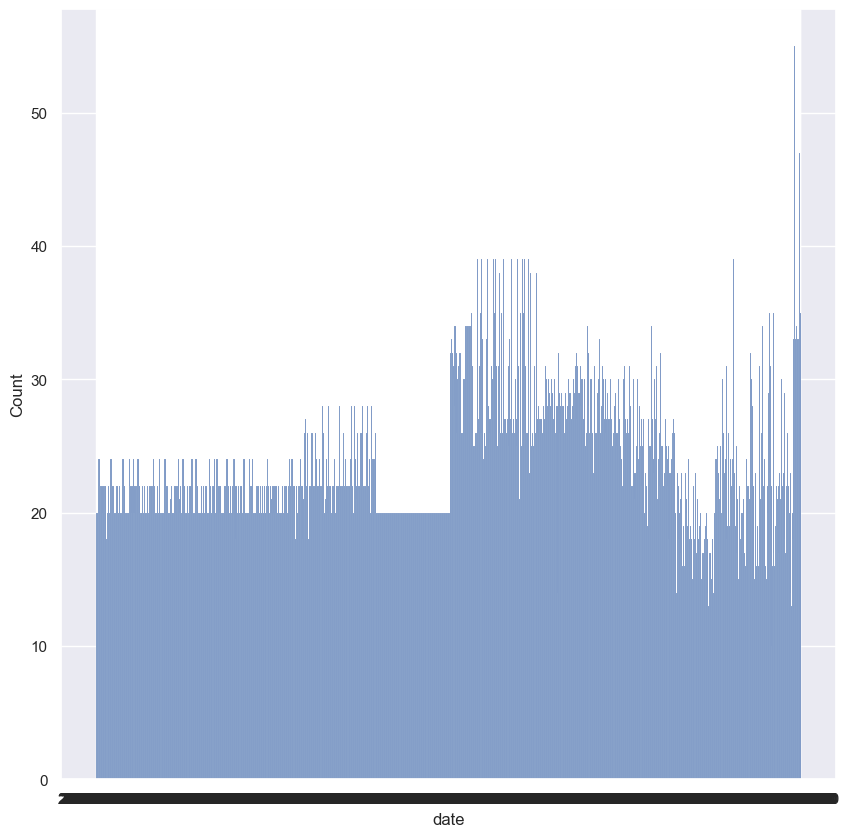

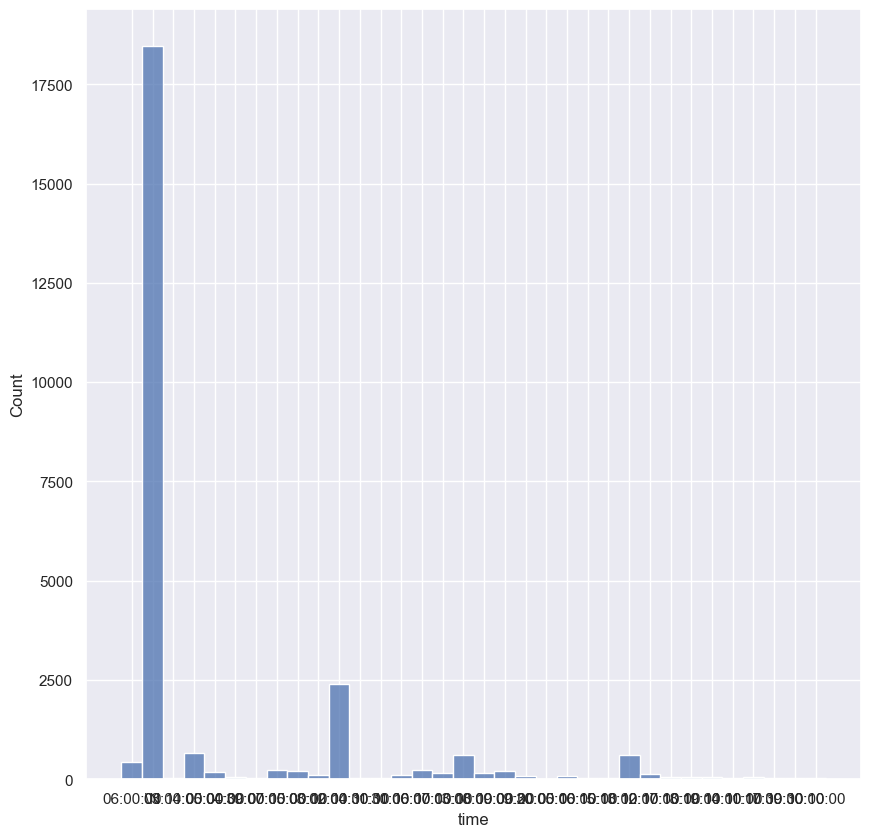

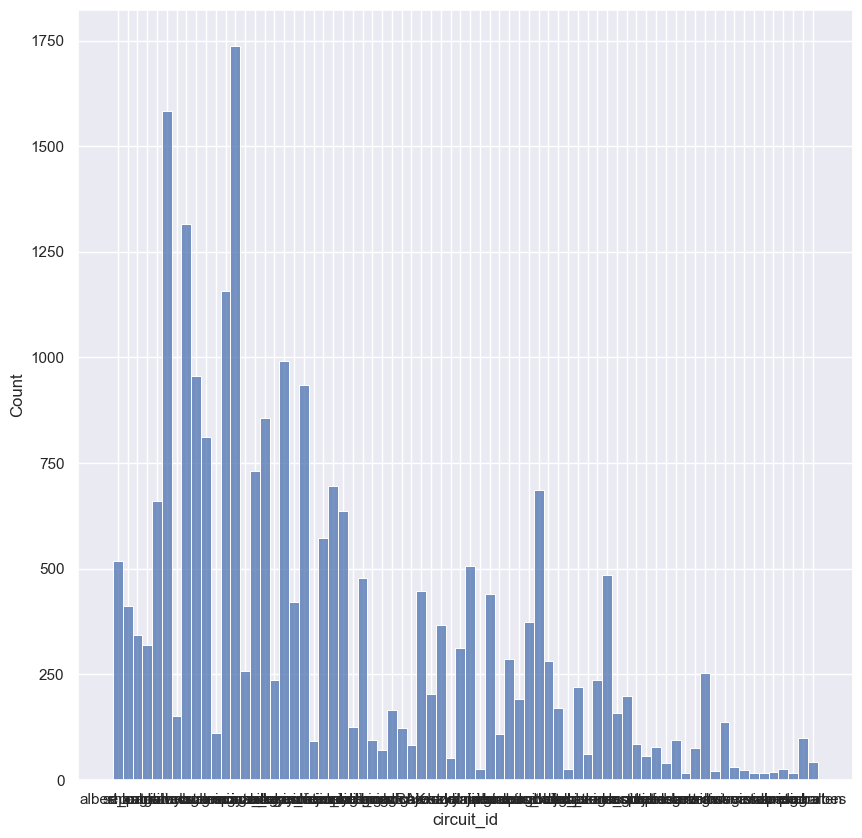

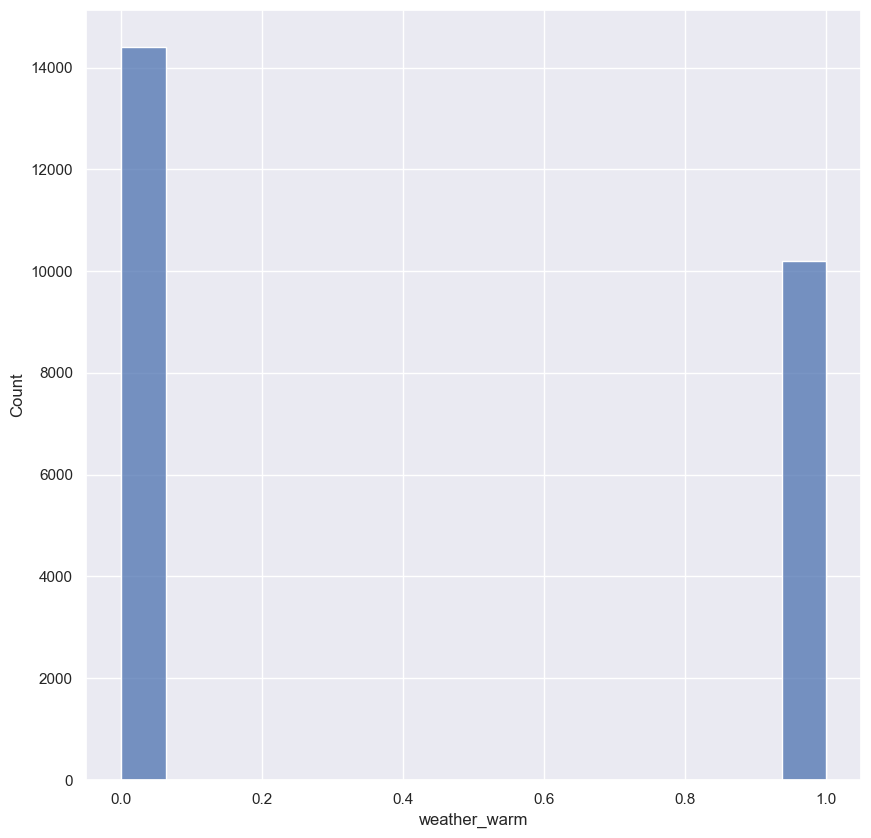

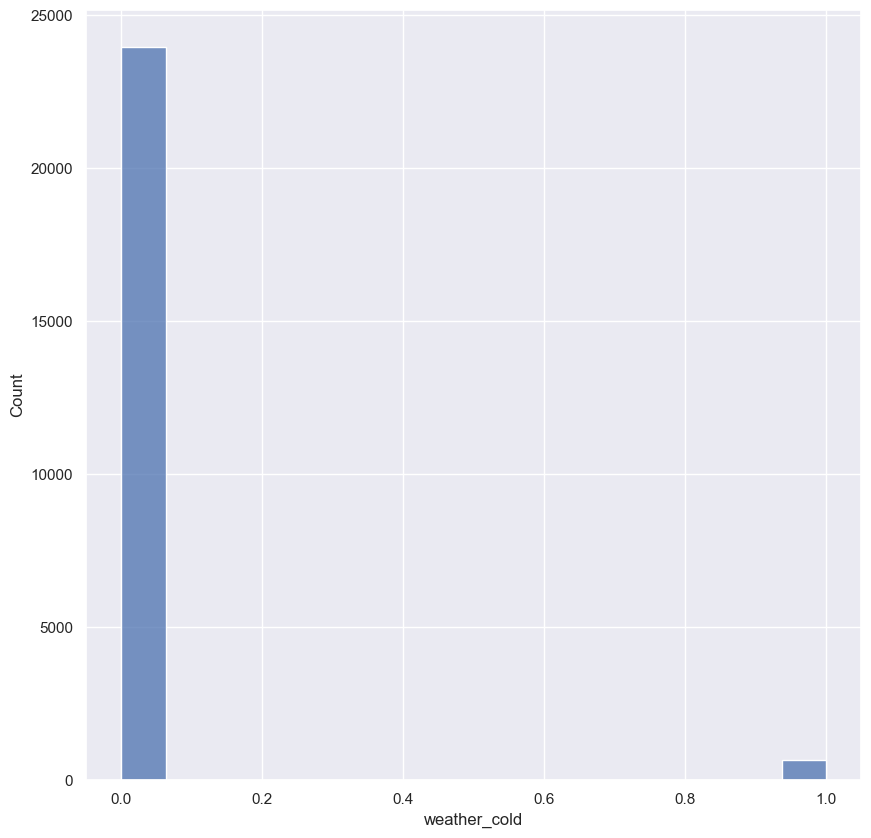

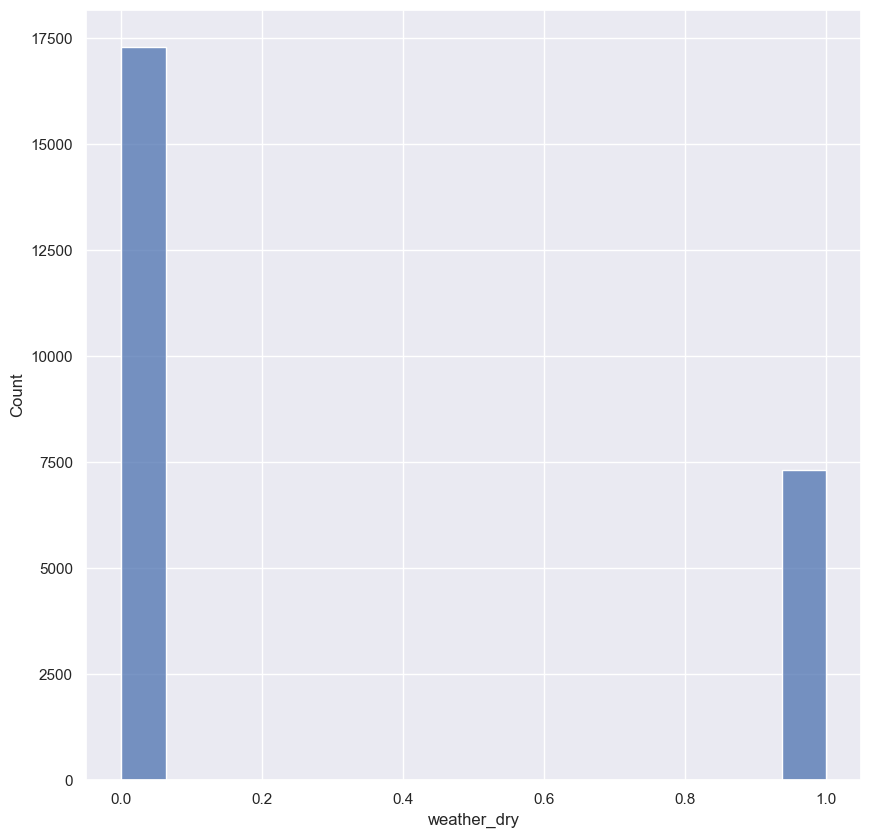

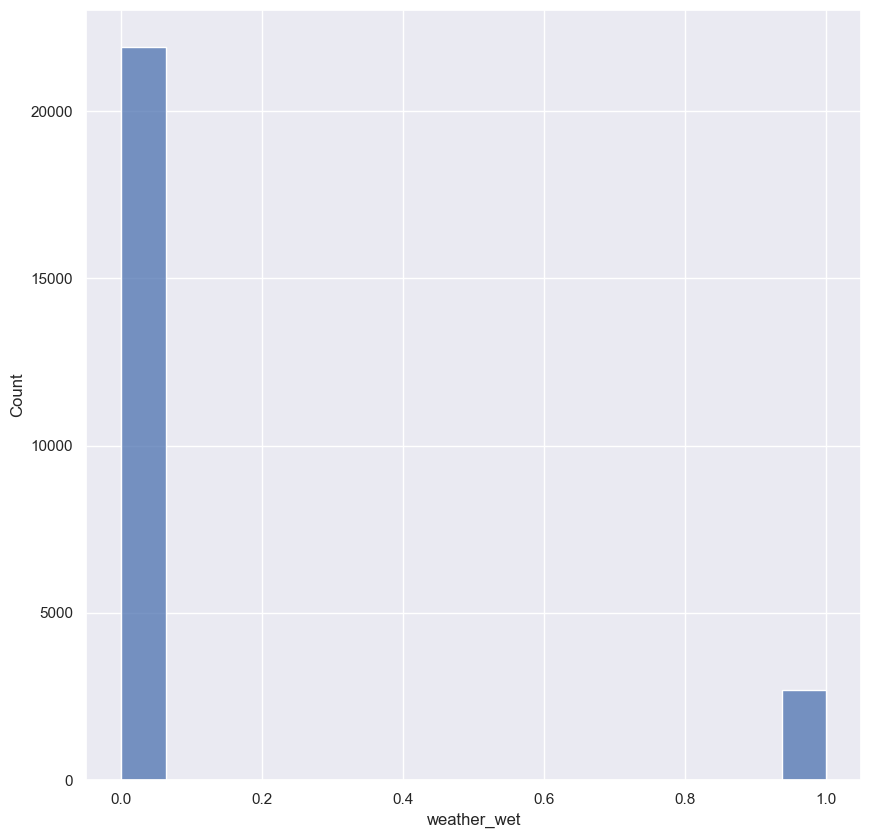

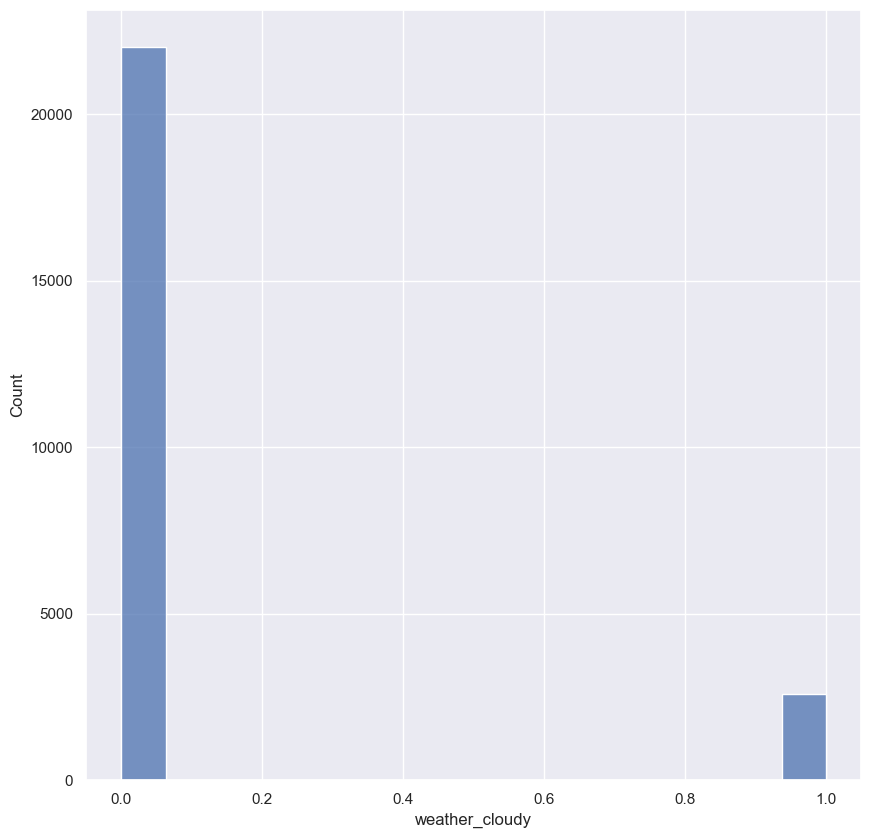

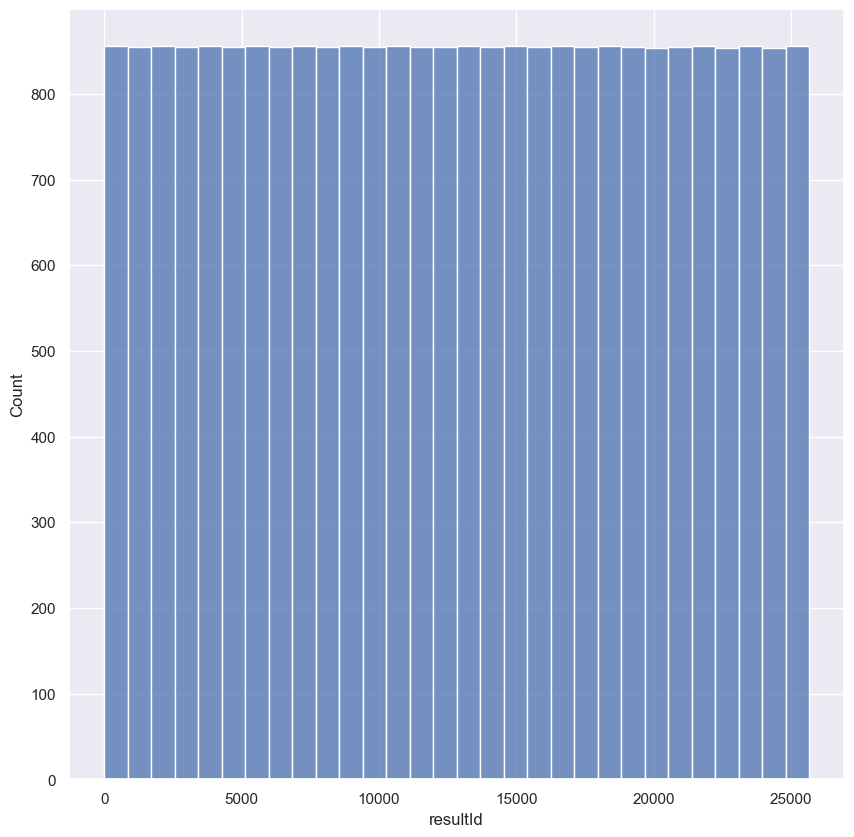

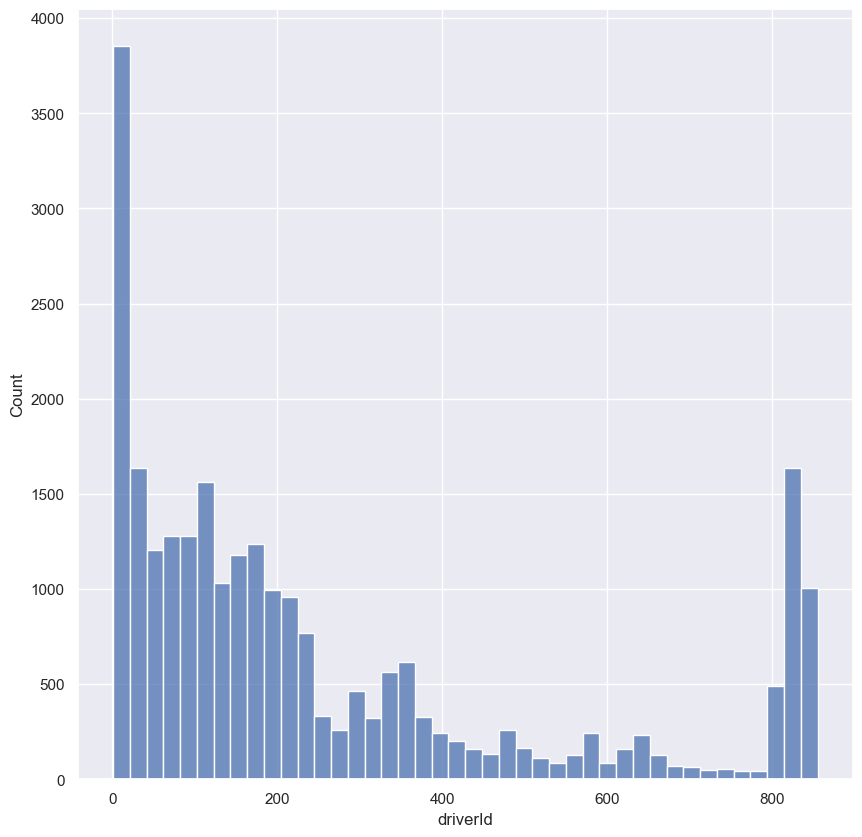

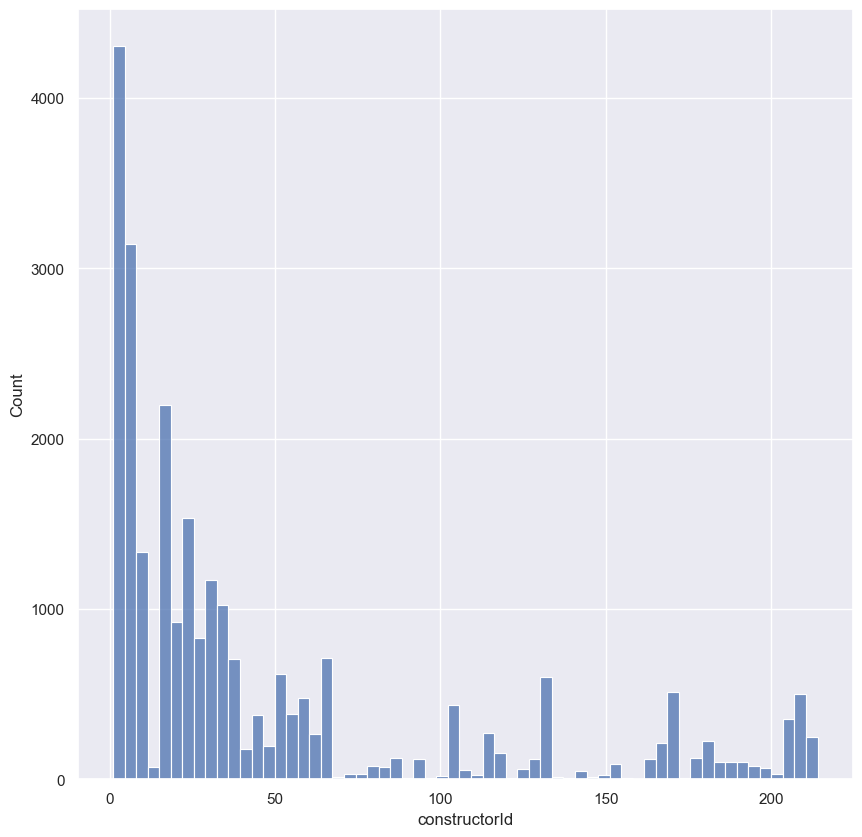

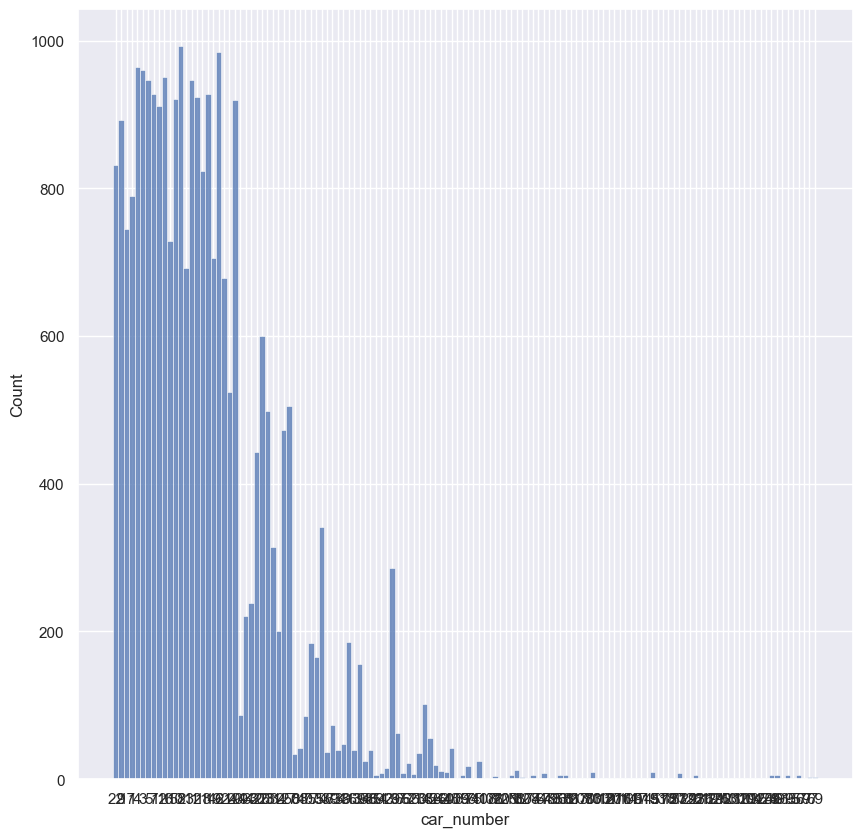

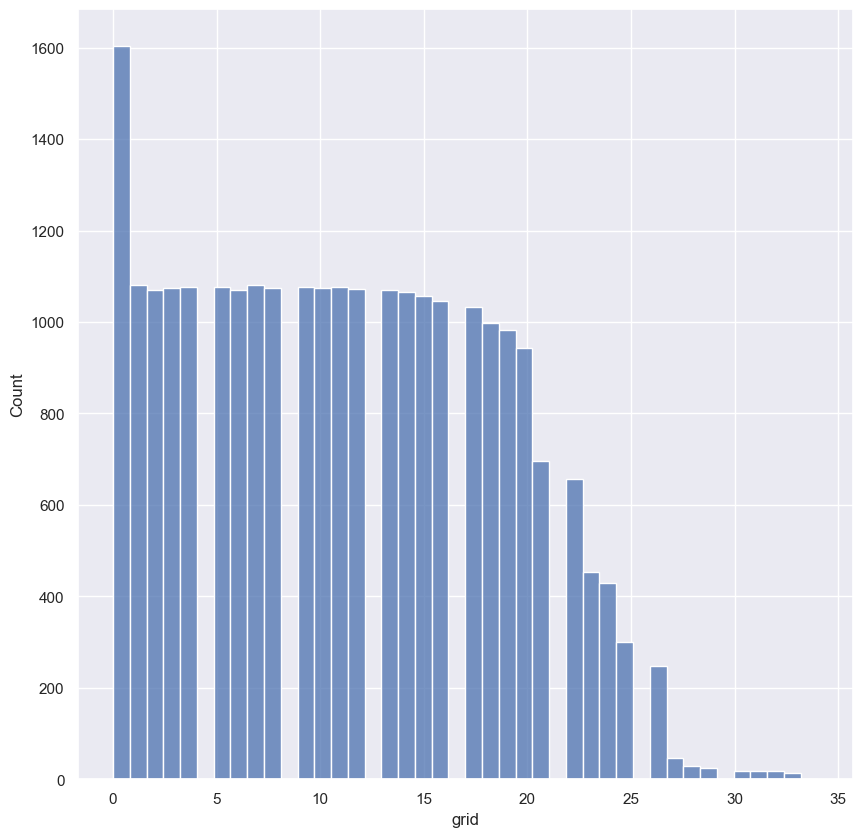

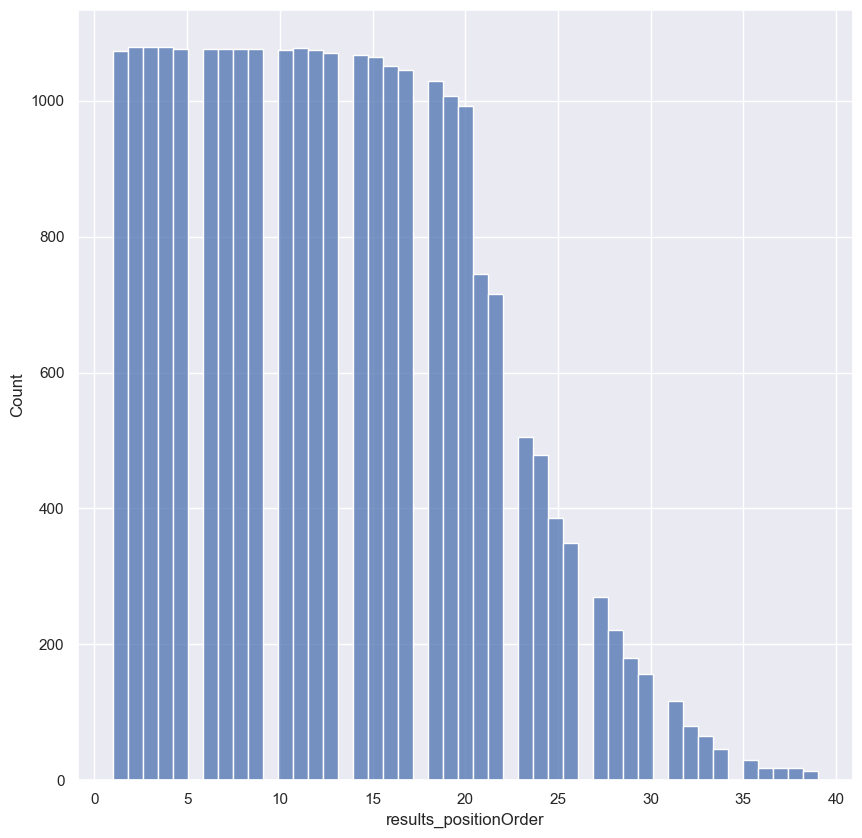

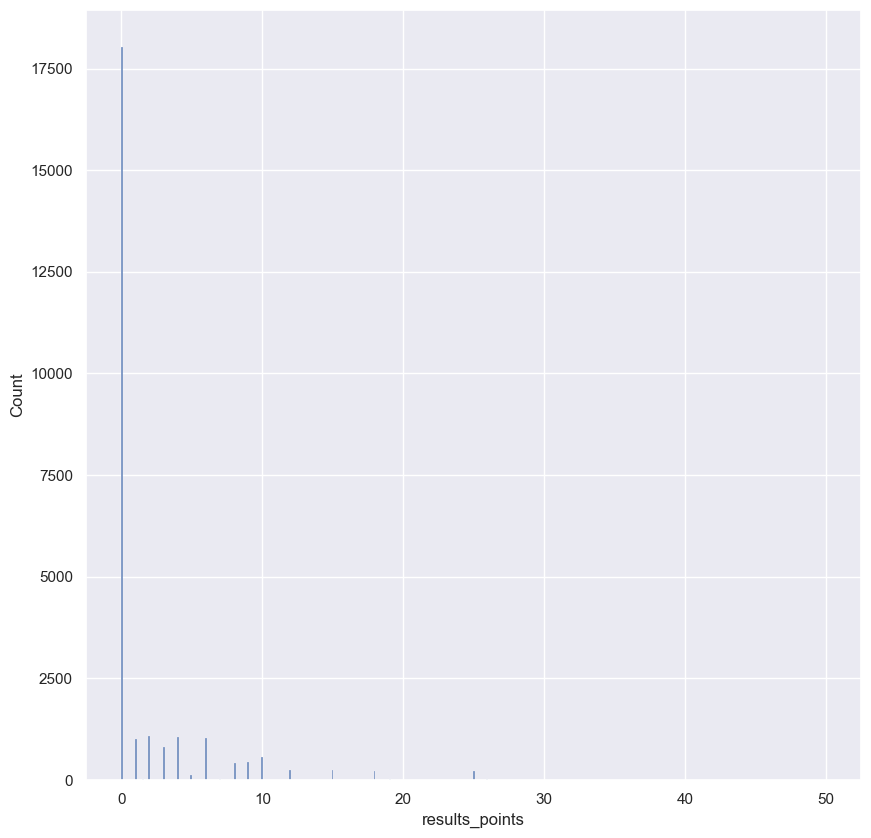

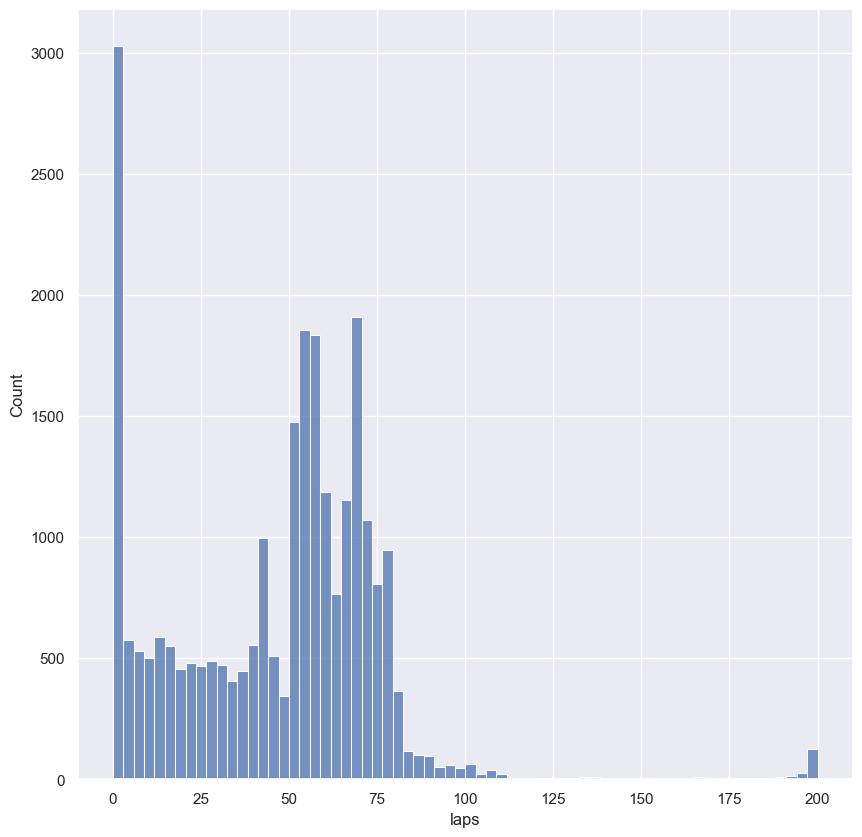

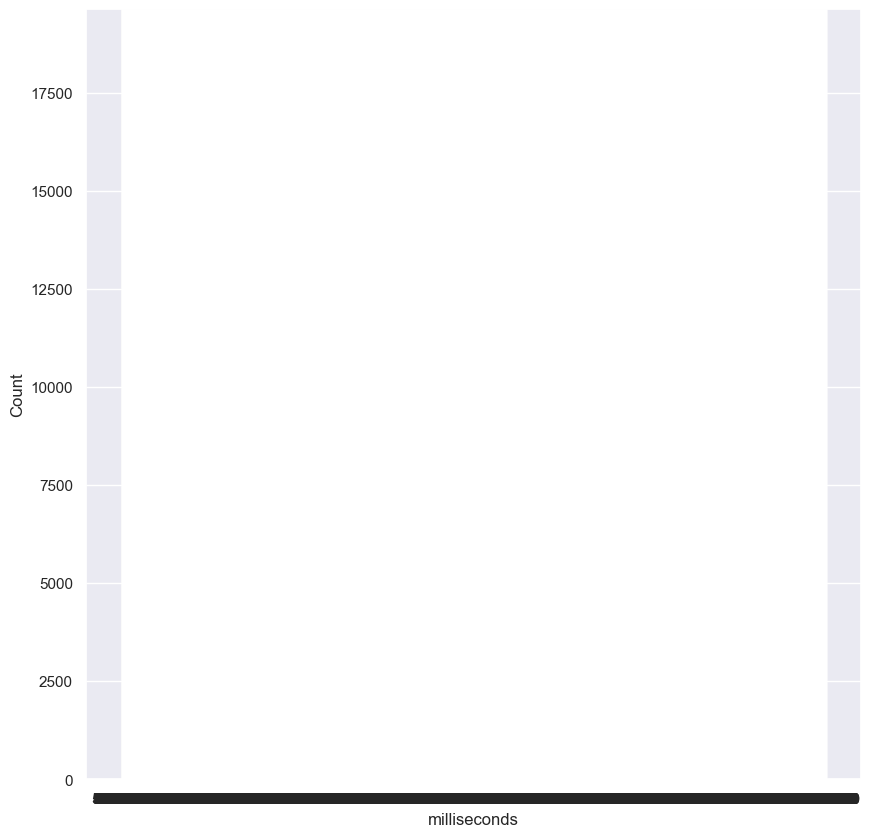

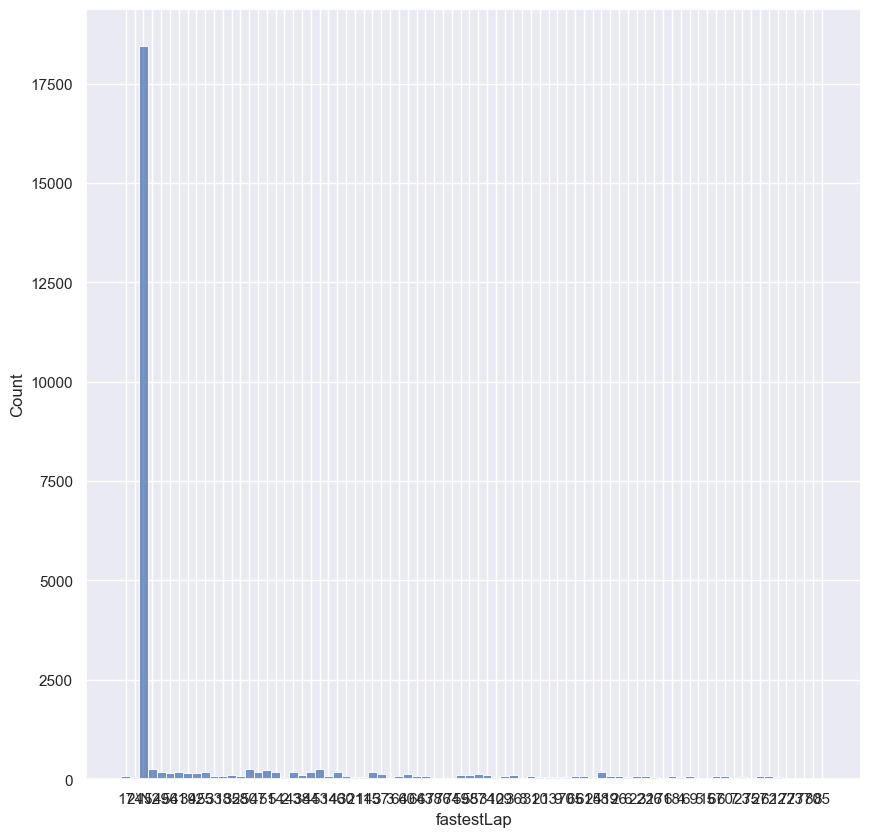

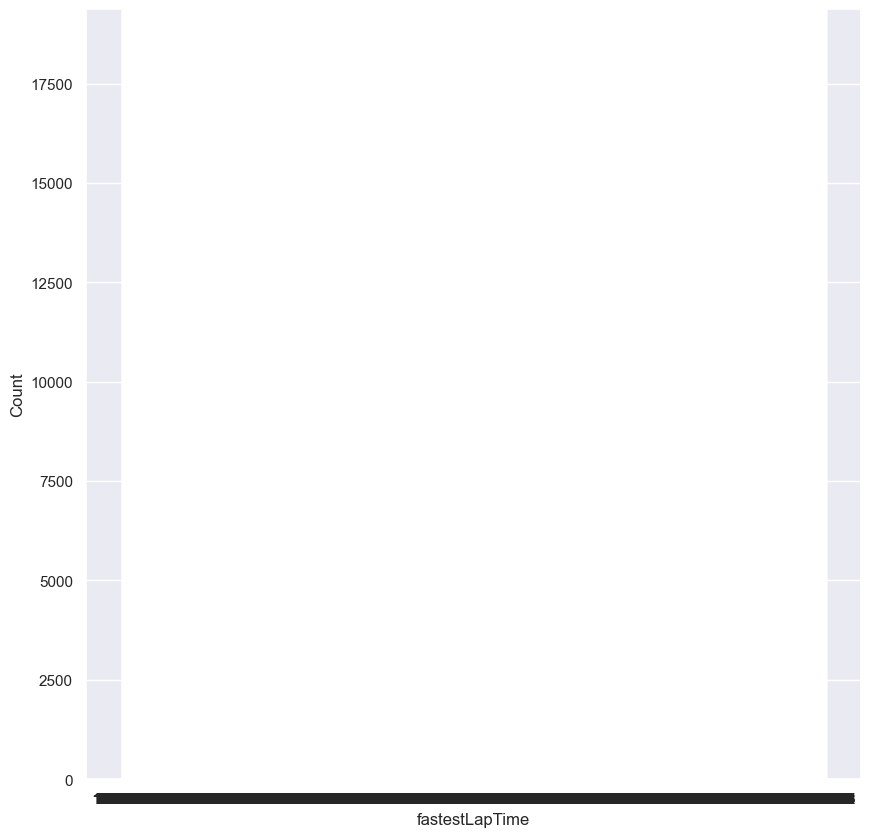

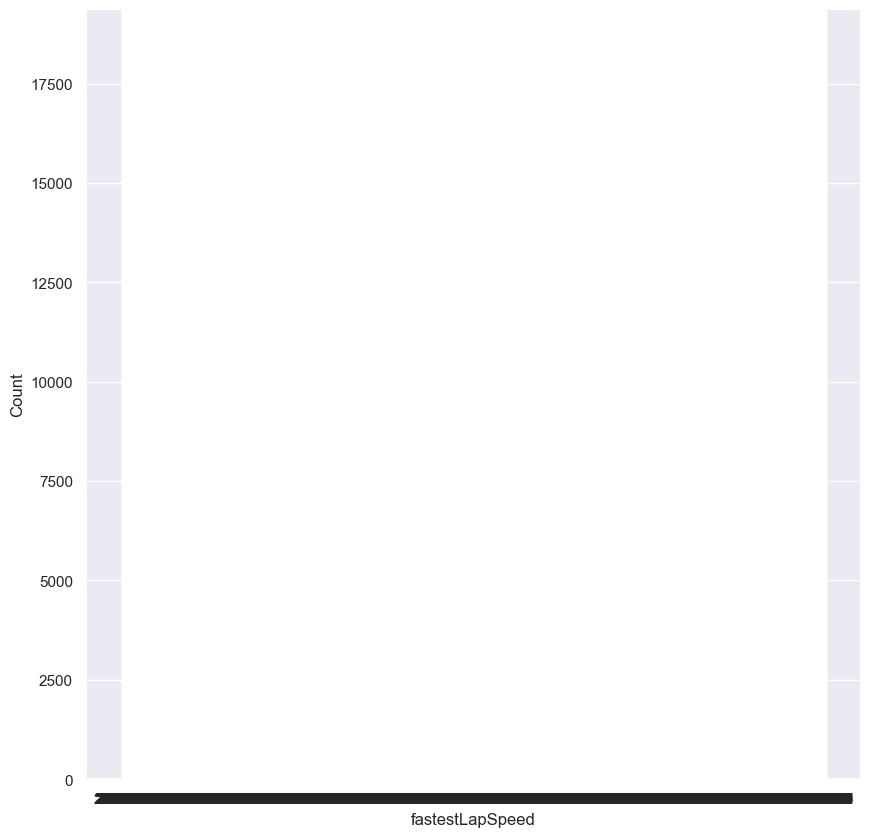

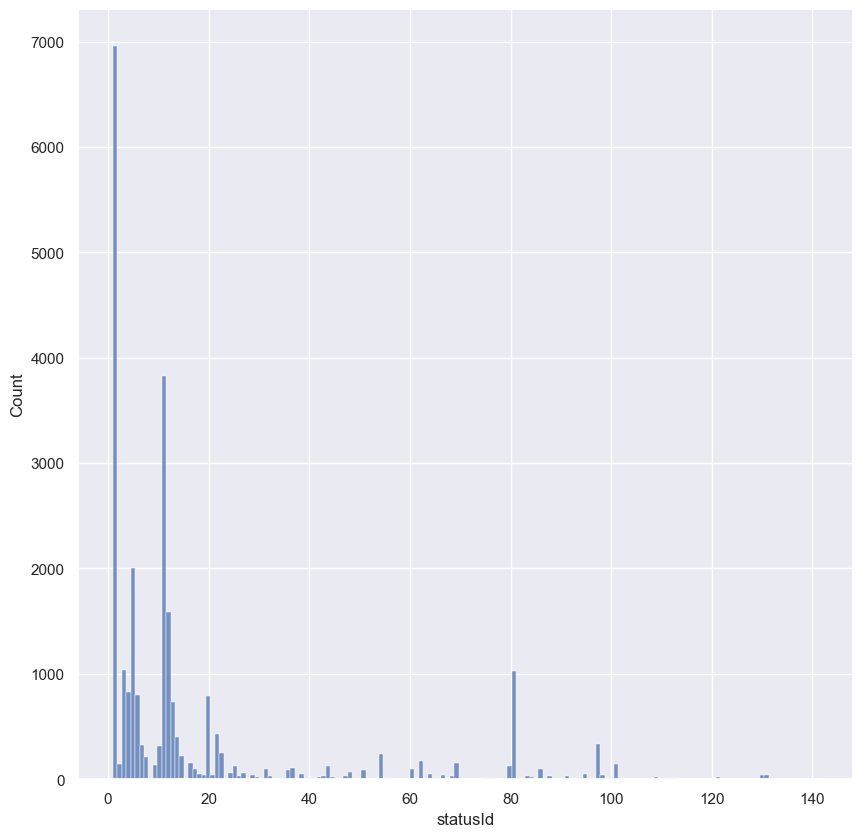

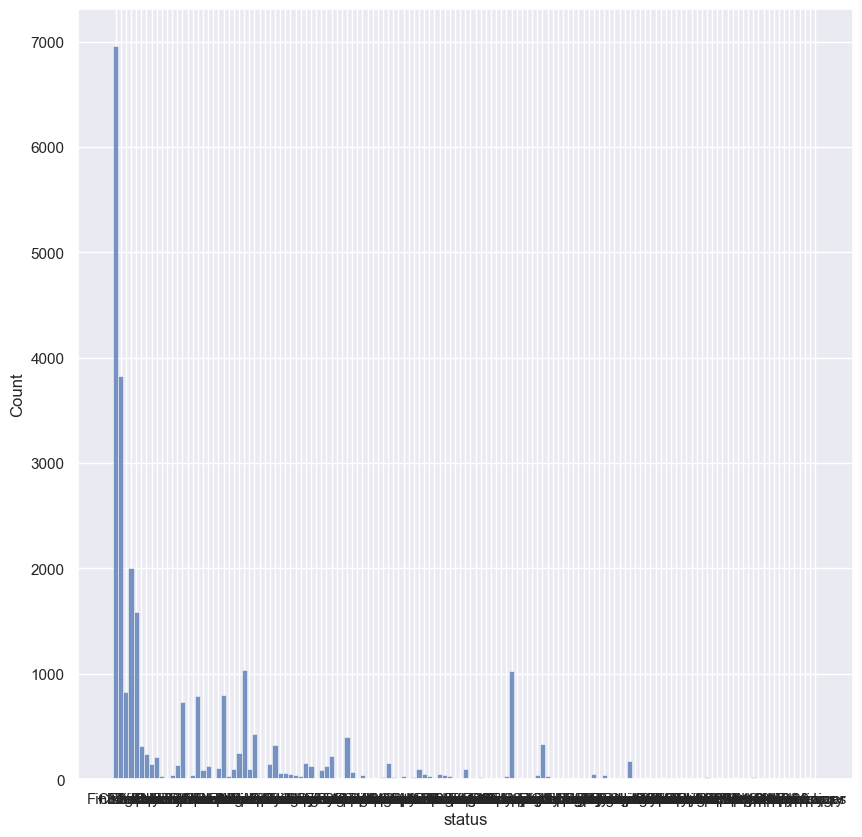

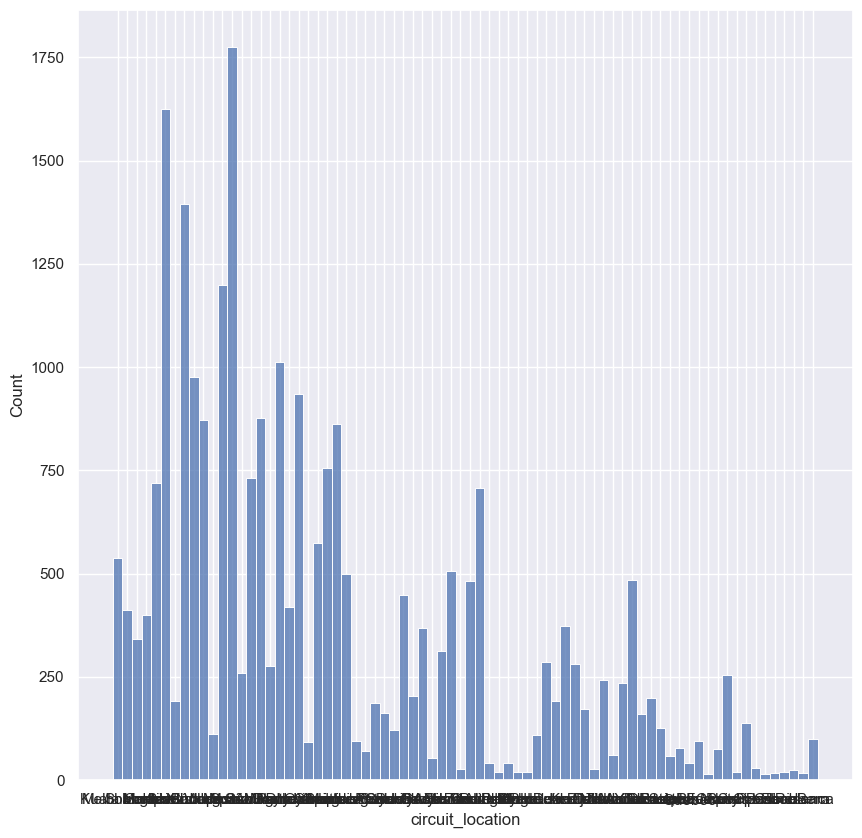

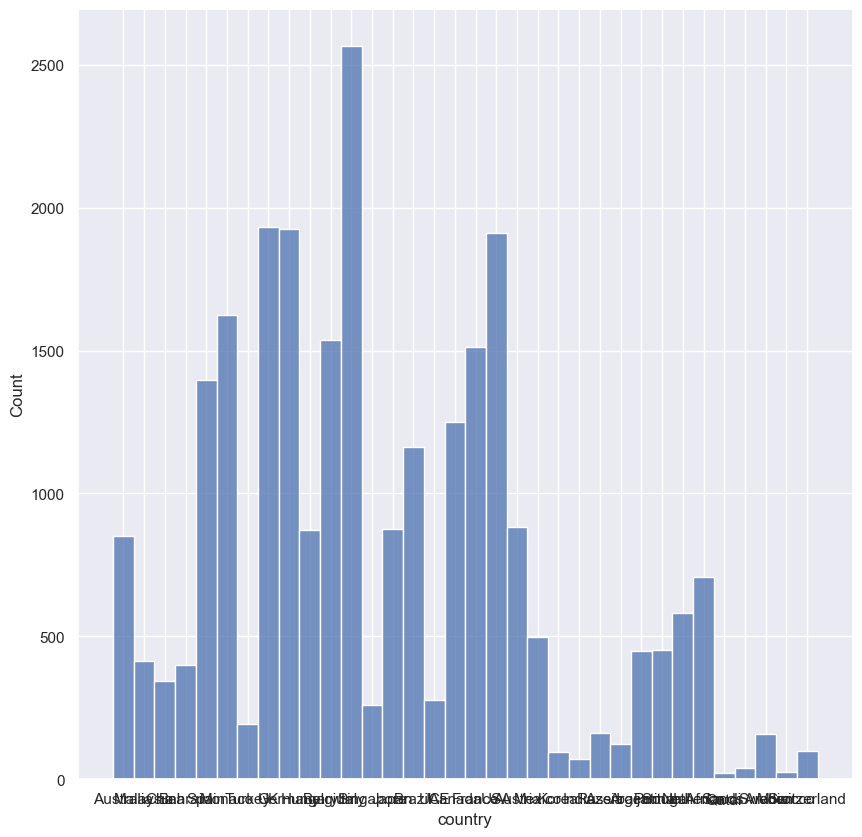

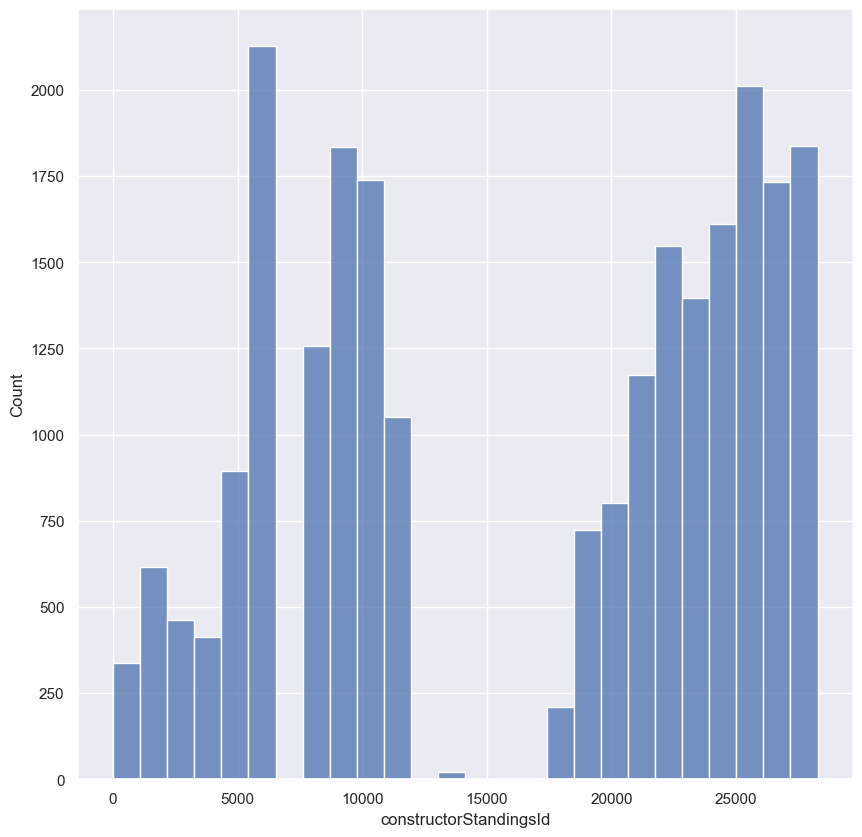

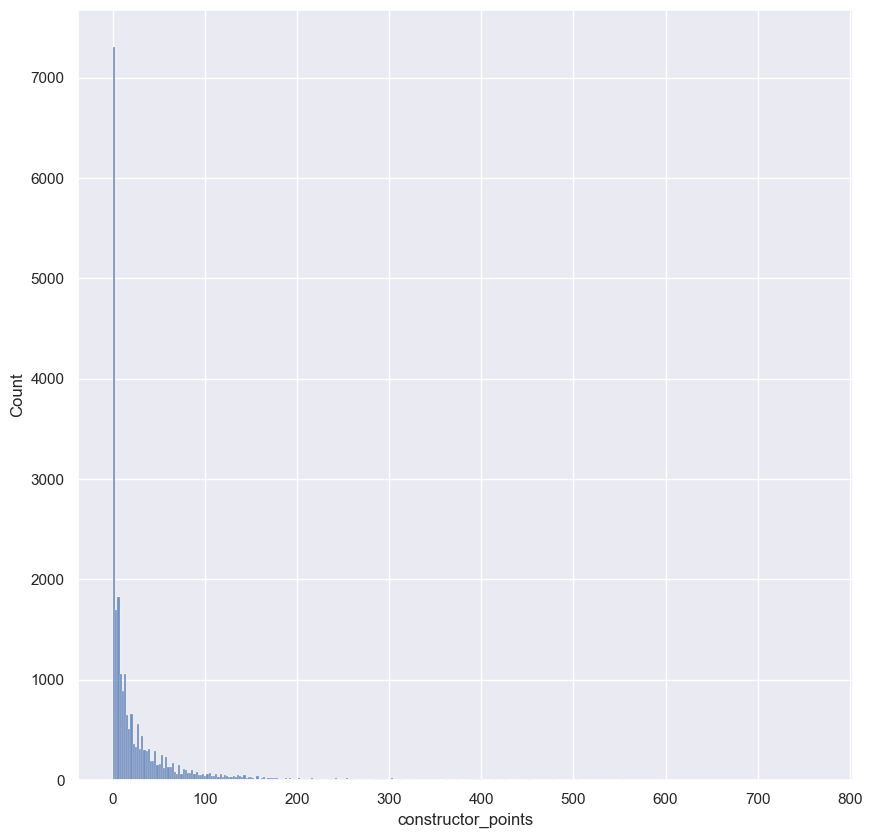

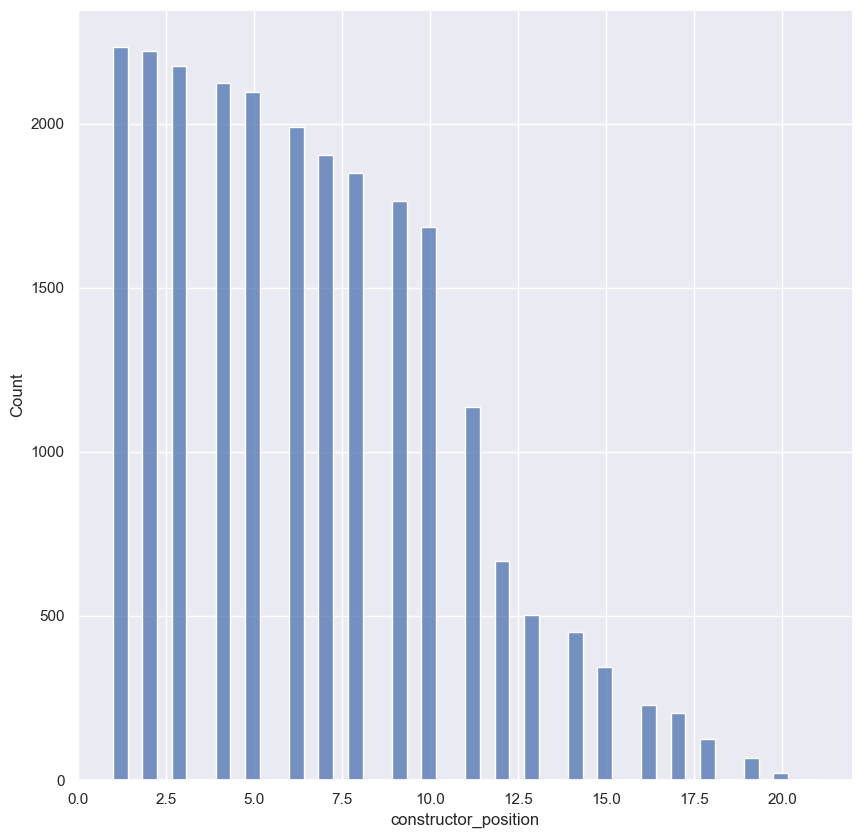

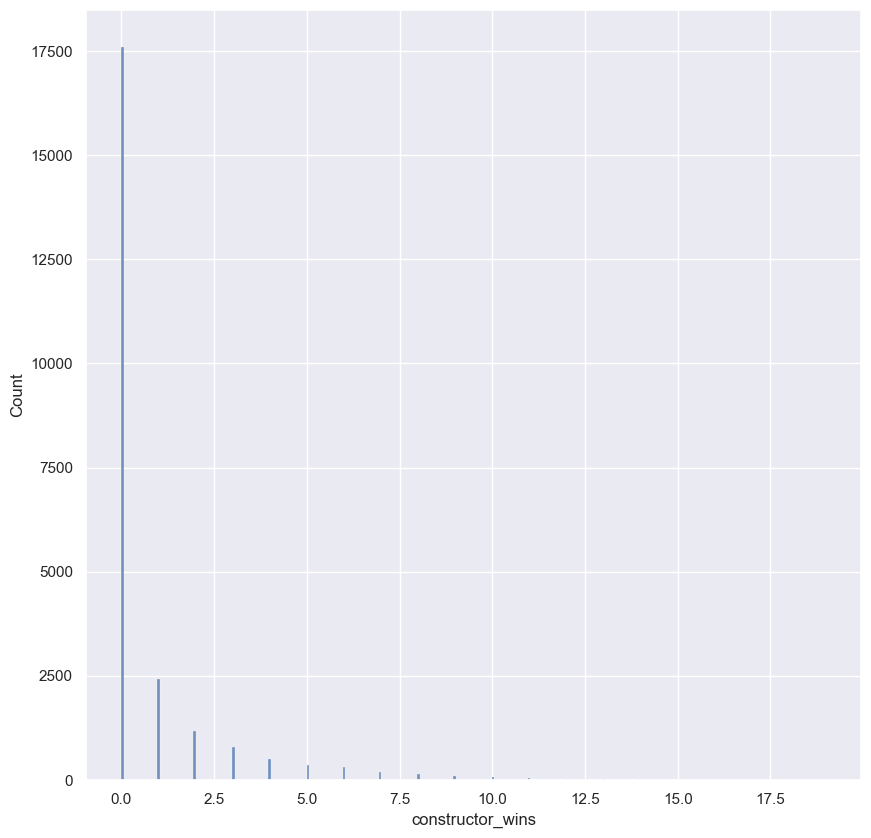

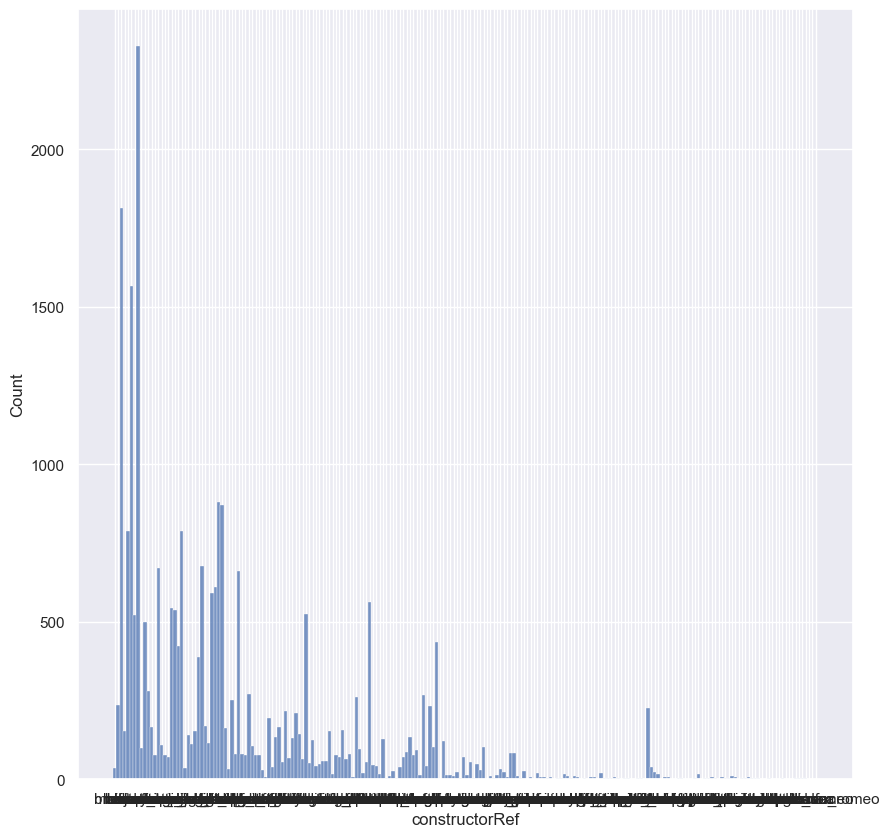

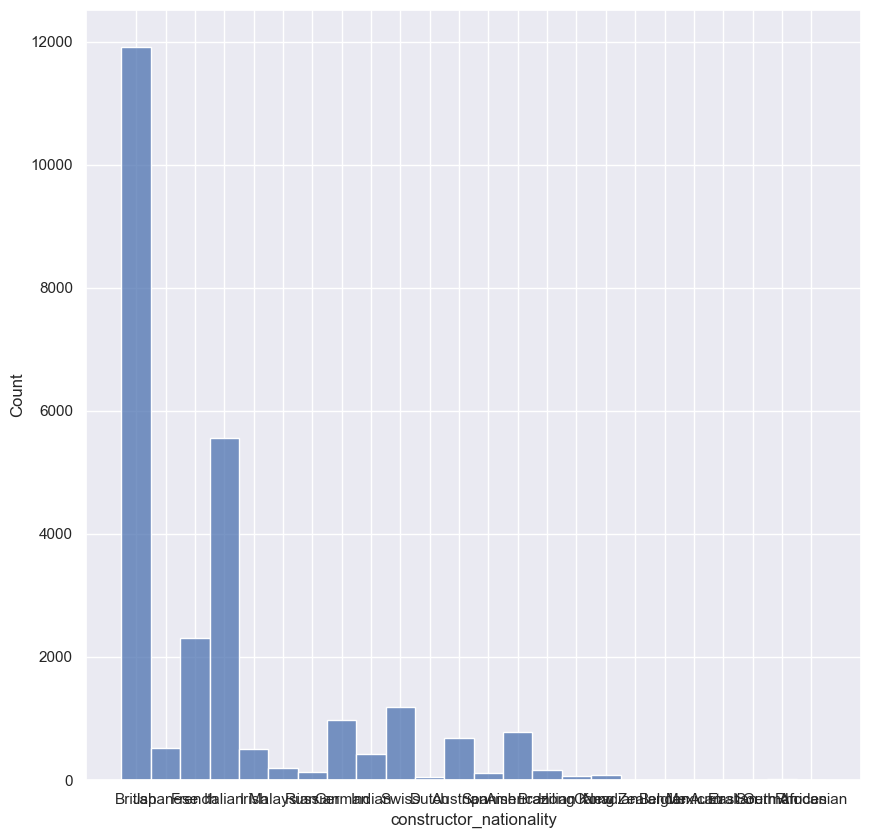

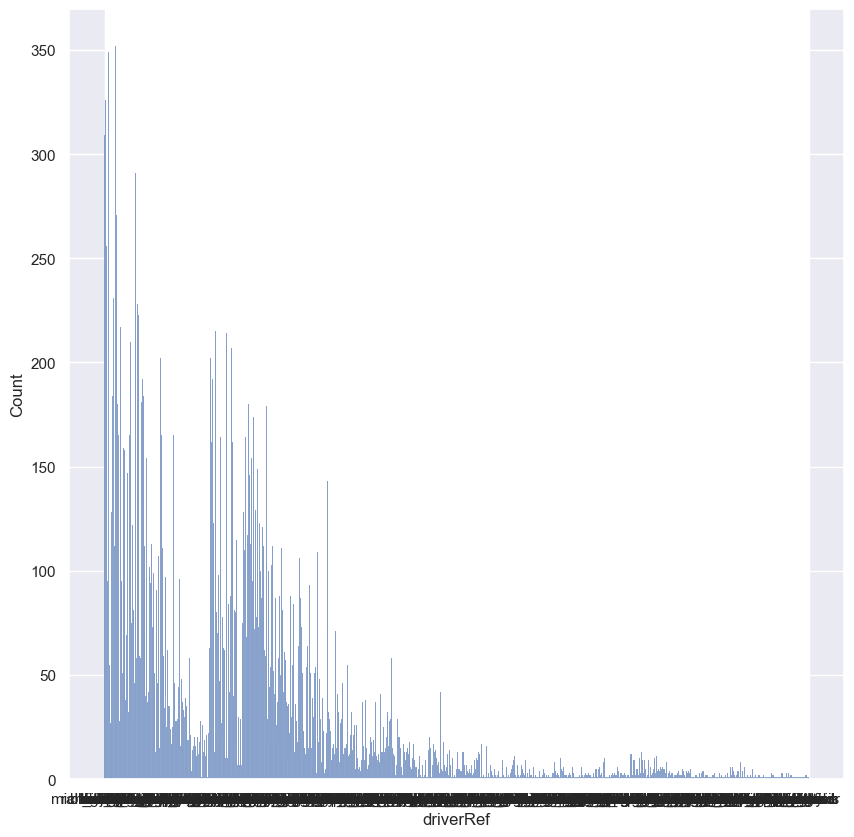

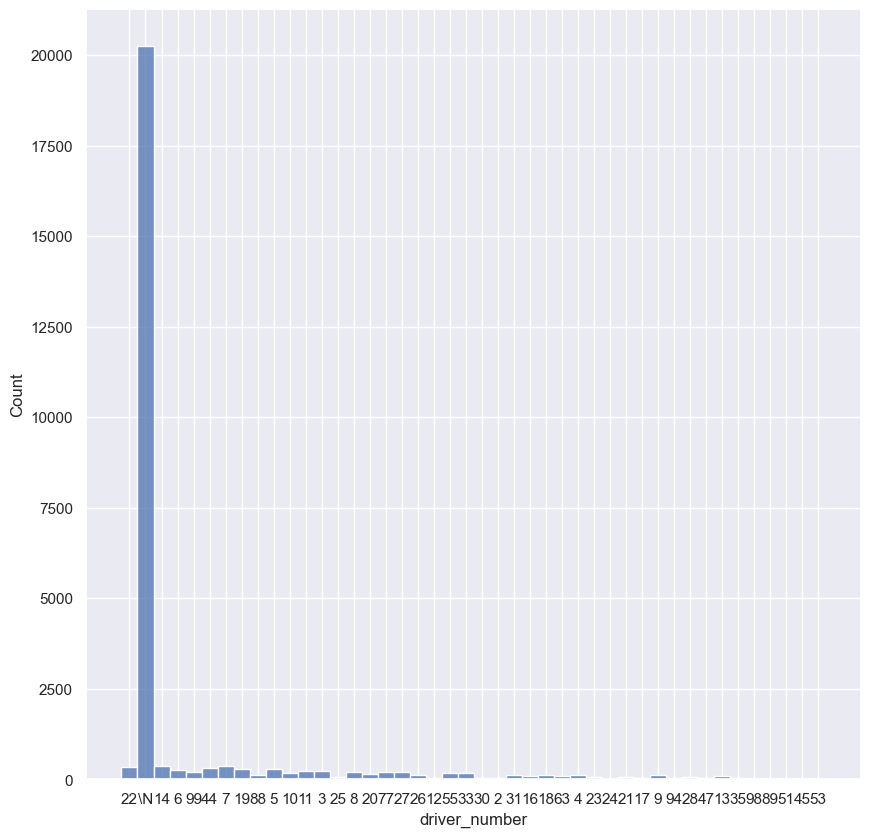

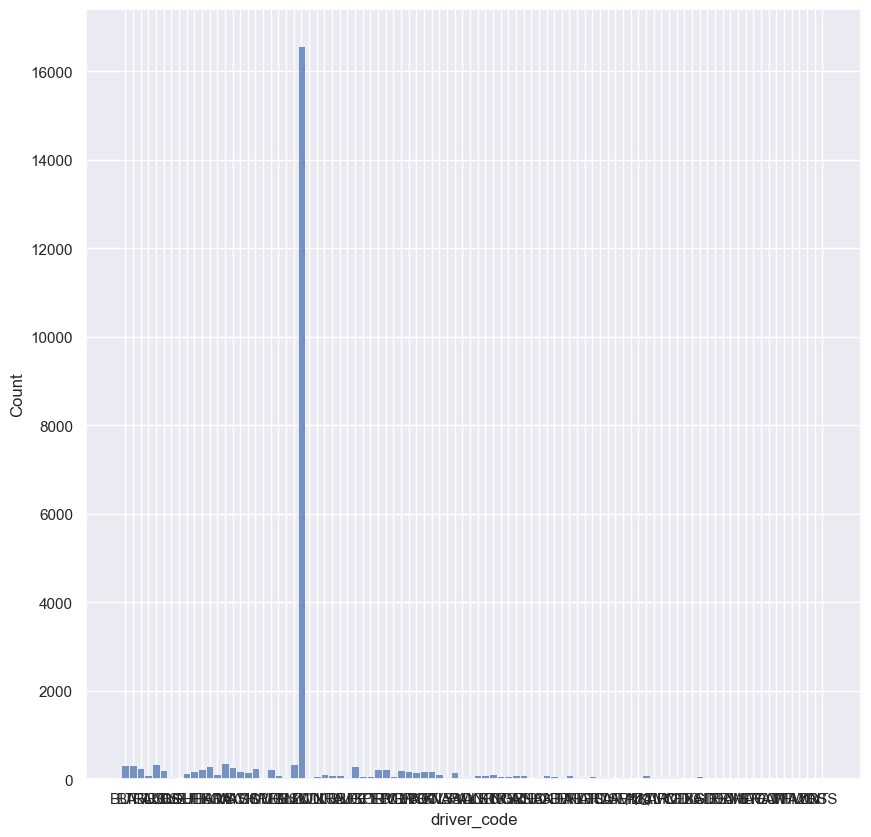

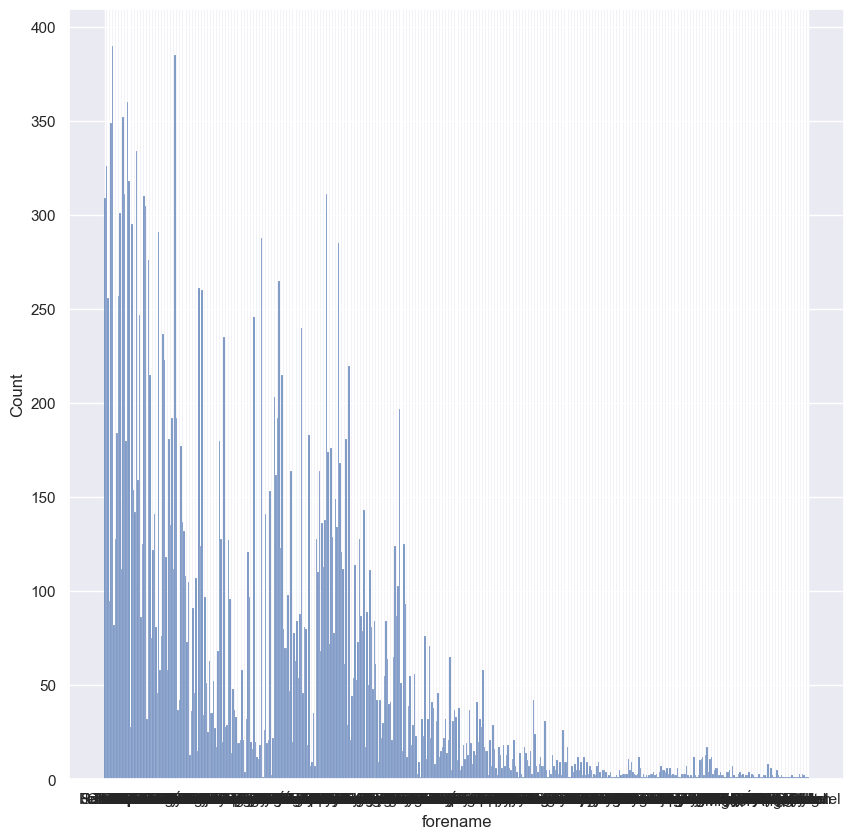

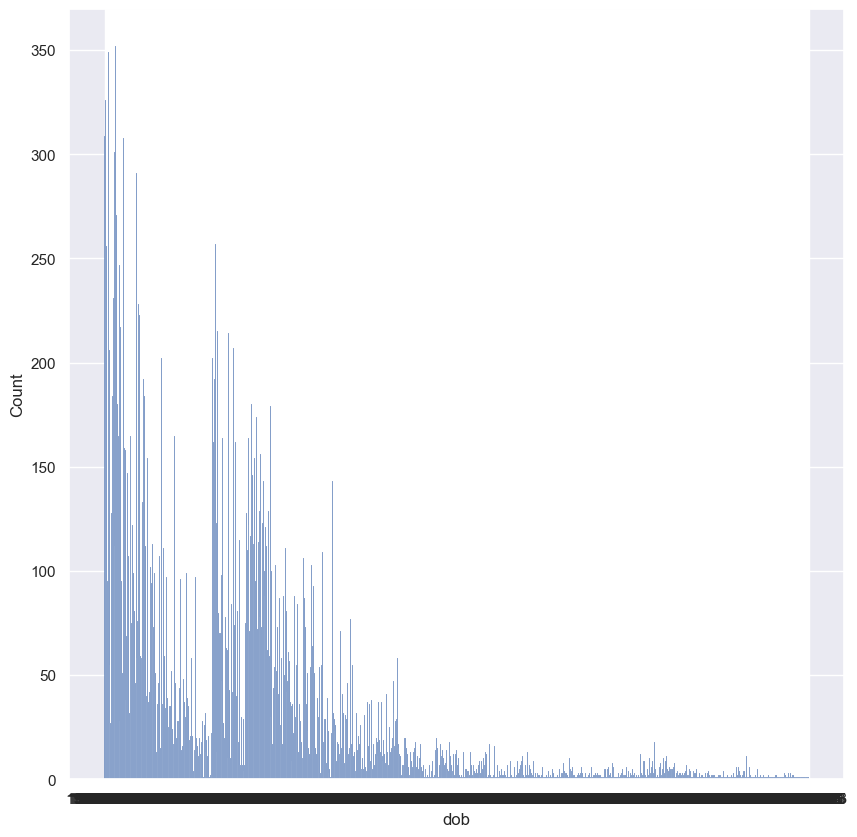

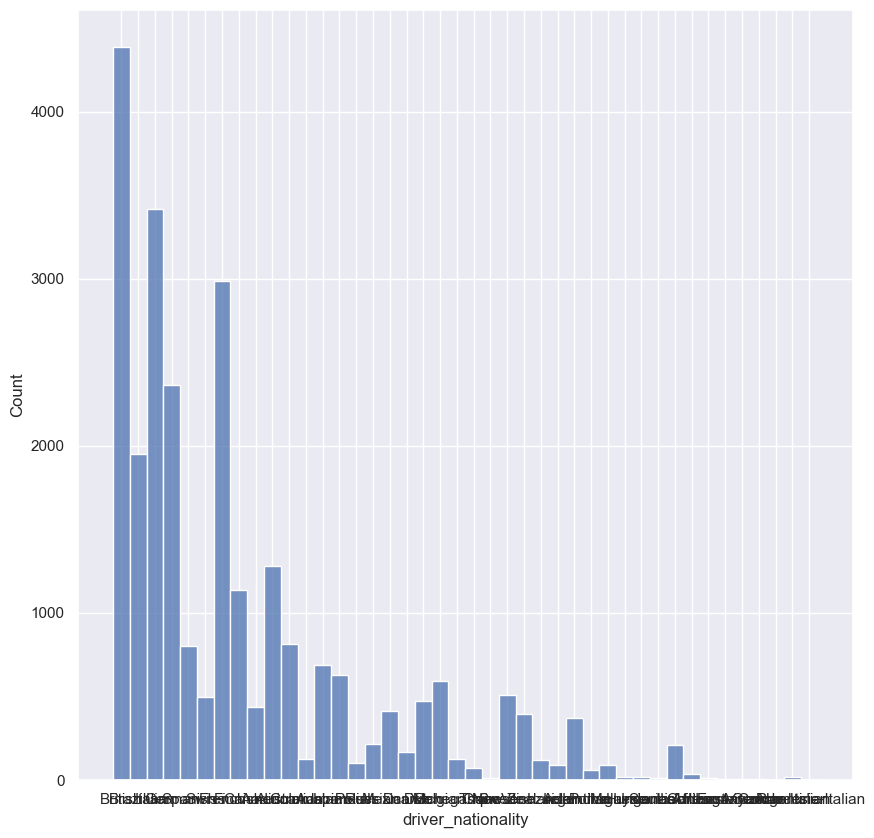

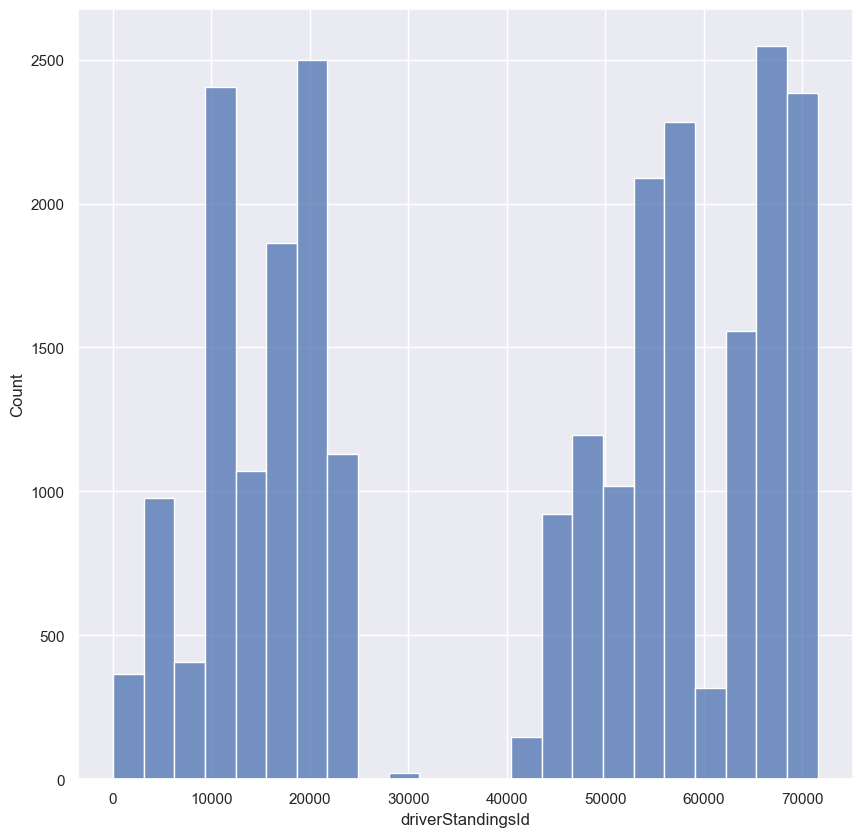

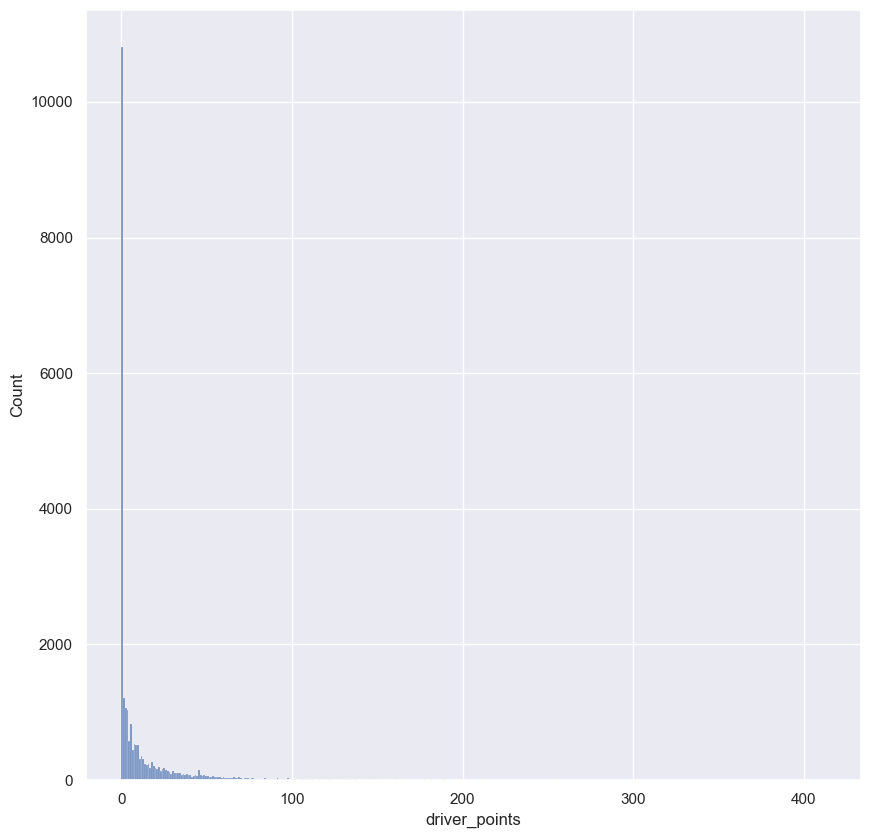

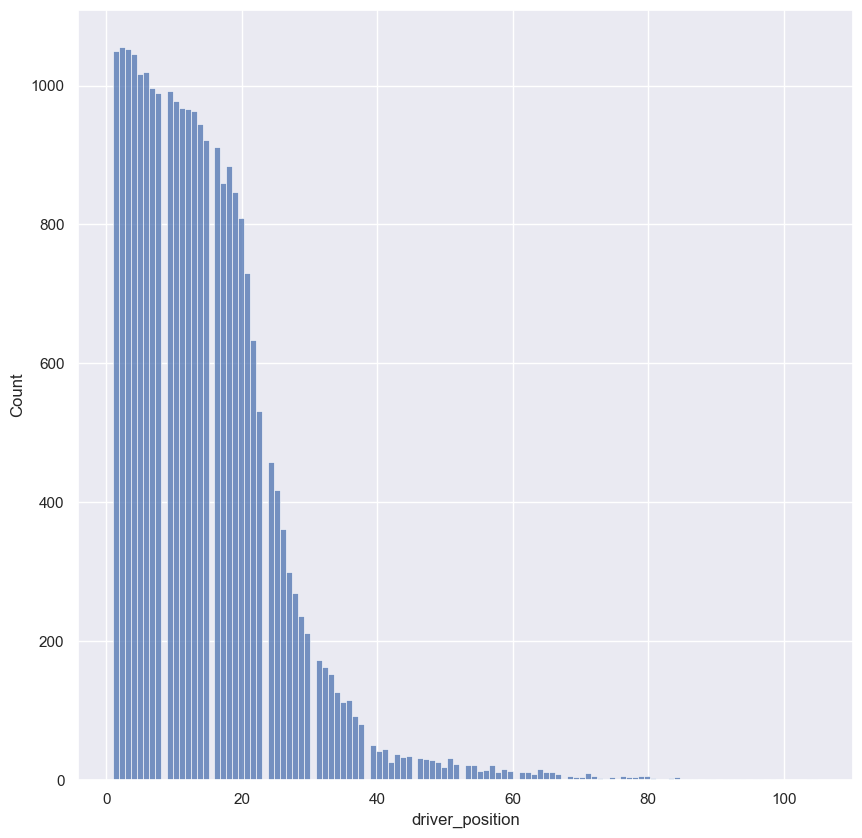

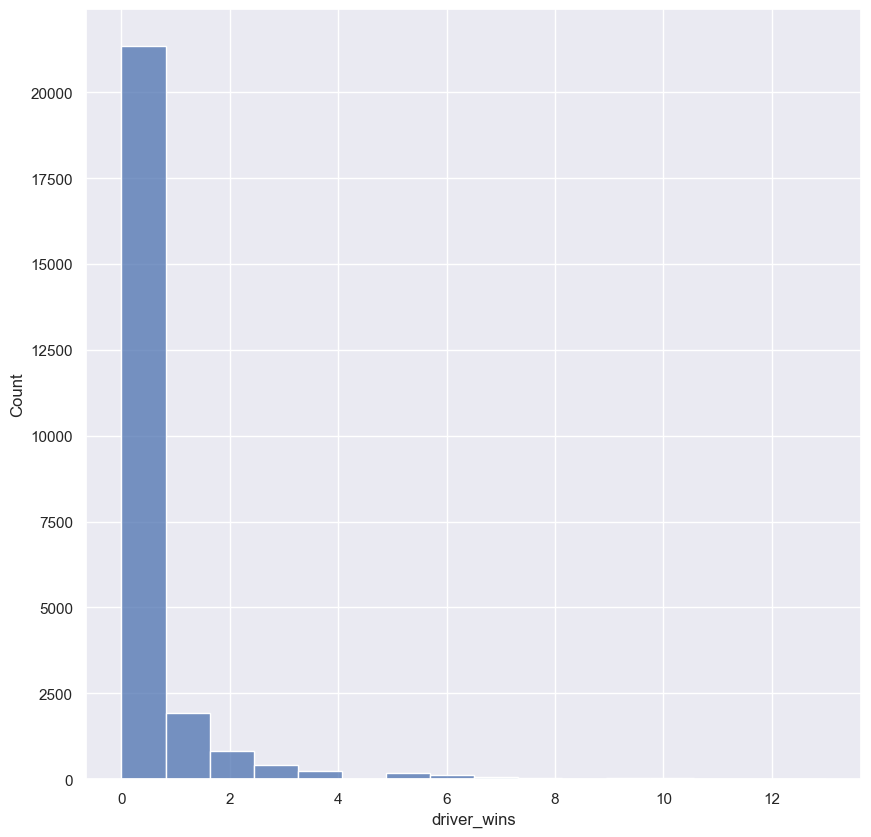

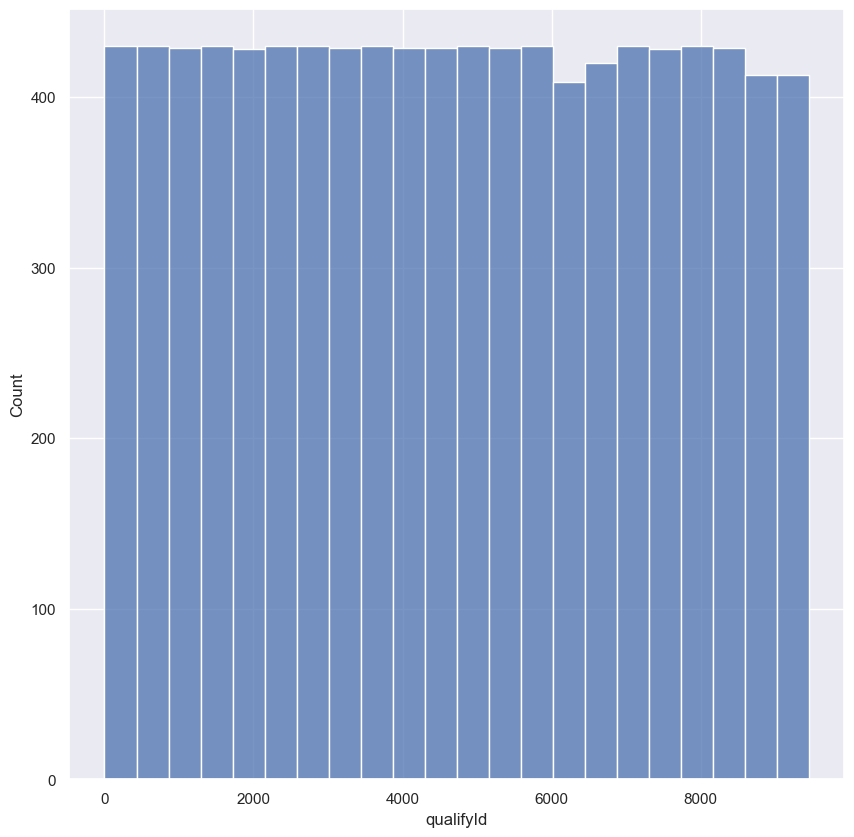

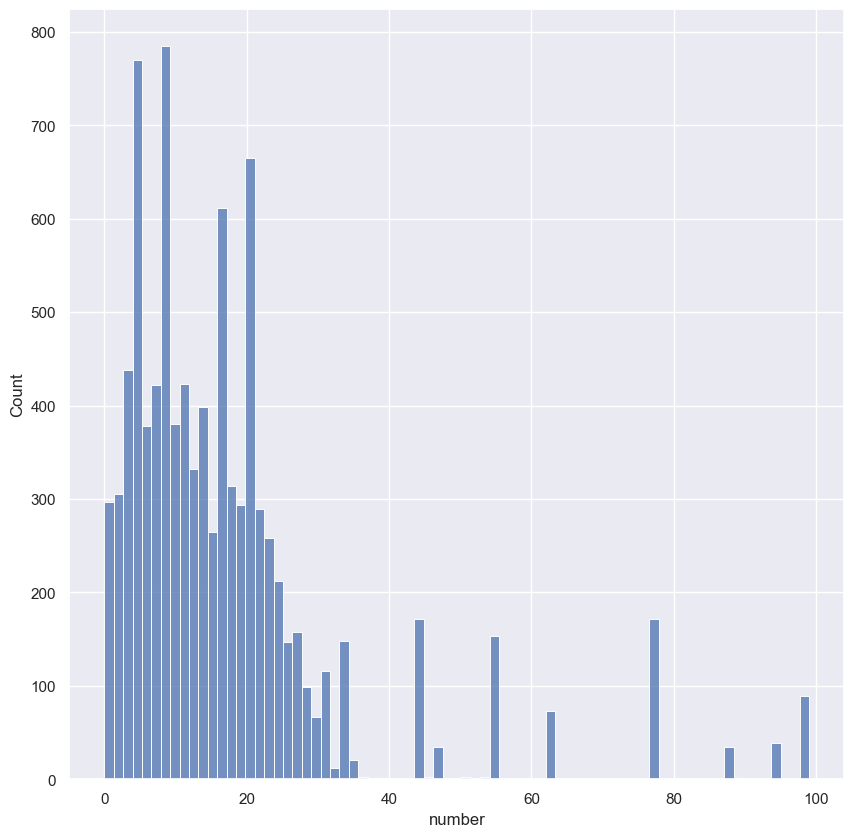

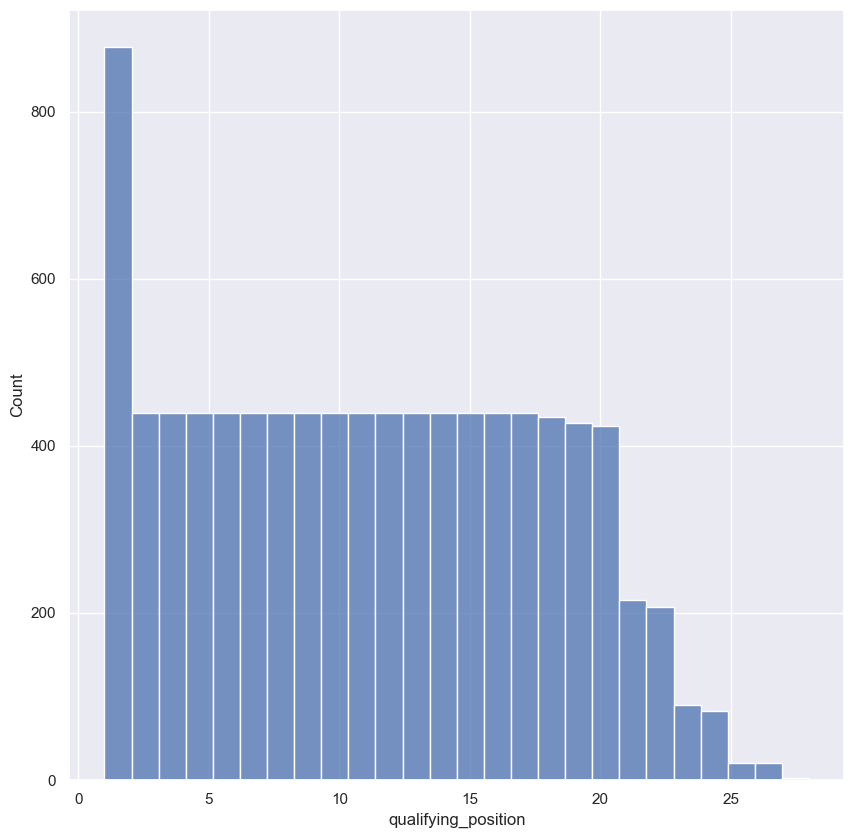

KeyboardInterrupt: 

In [68]:
for i in df_11.columns: 
    sns.histplot(df_11[i])
    plt.show()

#### BOXPLOTS

In [ ]:
df_num = df_11.select_dtypes(include=[np.number])
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.title(i)
    plt.show()

#### SCATTER PLOTS

In [ ]:
# CONFUSED 
# df_11.plot.scatter(x = 'raceId')

#### KDE PLOTS

In [ ]:
for i in df_num.columns:
    sns.kdeplot(df_11, x = i)
    plt.show()

#### HEATMAP

In [ ]:
df_num = df_11.select_dtypes(include=[np.number])
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(df_11.corr(), annot = True, cmap='RdYlBu_r')

##### GRAPHS

In [ ]:
df_11.head()
df_11.columns

In [ ]:
# Drivers by nationality
nationality_driver = df_11.groupby(['driver_nationality'])['driver_nationality'].count().sort_values(ascending = False).reset_index(name = 'number_of_drivers')
nationality_driver.plot(x = 'driver_nationality', y = 'number_of_drivers', kind = 'bar')    
nationality_driver.set_index('driver_nationality').plot(x = 'driver_nationality', y = 'number_of_drivers', kind = 'pie', autopct='%1.0f%%')    
plt.title('Drivers by nationality')


In [ ]:
# Champions by nationality
from matplotlib.pyplot import title


champions = df_11.groupby(['driver_nationality','year','driverRef'])[['results_points', 'driver_wins']].max().sort_values('results_points', ascending=False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)
champion_nations = champions.driver_nationality.value_counts().to_frame()
# champion_nations.plot(kind = 'pie', y = 'driver_nationality', autopct='%1.1f%%')
fig = go.Figure(data = go.Pie(labels=champion_nations.index, values=champion_nations['driver_nationality']))
fig.update_layout(title = 'Champions by Nationality')
fig.show()


In [ ]:
# Most wins in a single season
positions = df_11[df_11['driver_position'] == 1].groupby(['year', 'driverRef'])['driver_wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions = positions[positions['Wins'] >= positions['Wins'].mean()]
positions.rename(columns={'driverRef':'Name'},inplace=True)

fig = px.scatter(positions, x="year", y="Wins", color="Name",
                 title="Most wins in a single season",size = 'Wins')
fig.show()

In [ ]:
df_11.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'circuit_id', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'resultId', 'driverId',
       'constructorId', 'car_number', 'grid', 'results_positionOrder',
       'results_points', 'laps', 'milliseconds', 'fastestLap',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'status',
       'circuit_location', 'country', 'constructorStandingsId',
       'constructor_points', 'constructor_position', 'constructor_wins',
       'constructorRef', 'constructor_nationality', 'driverRef',
       'driver_number', 'driver_code', 'forename', 'dob', 'driver_nationality',
       'driverStandingsId', 'driver_points', 'driver_position', 'driver_wins',
       'qualifyId', 'number', 'qualifying_position', 'q1_time', 'q2_time',
       'q3_time', 'no_of_stops', 'ms_avg', 'first_5_avg_time',
       'last_10_avg_time', 'lap_position_after_5',
       'lap_position_before_last_10'],
      dt

In [ ]:
df_11.to_csv('./data/dataset.csv')